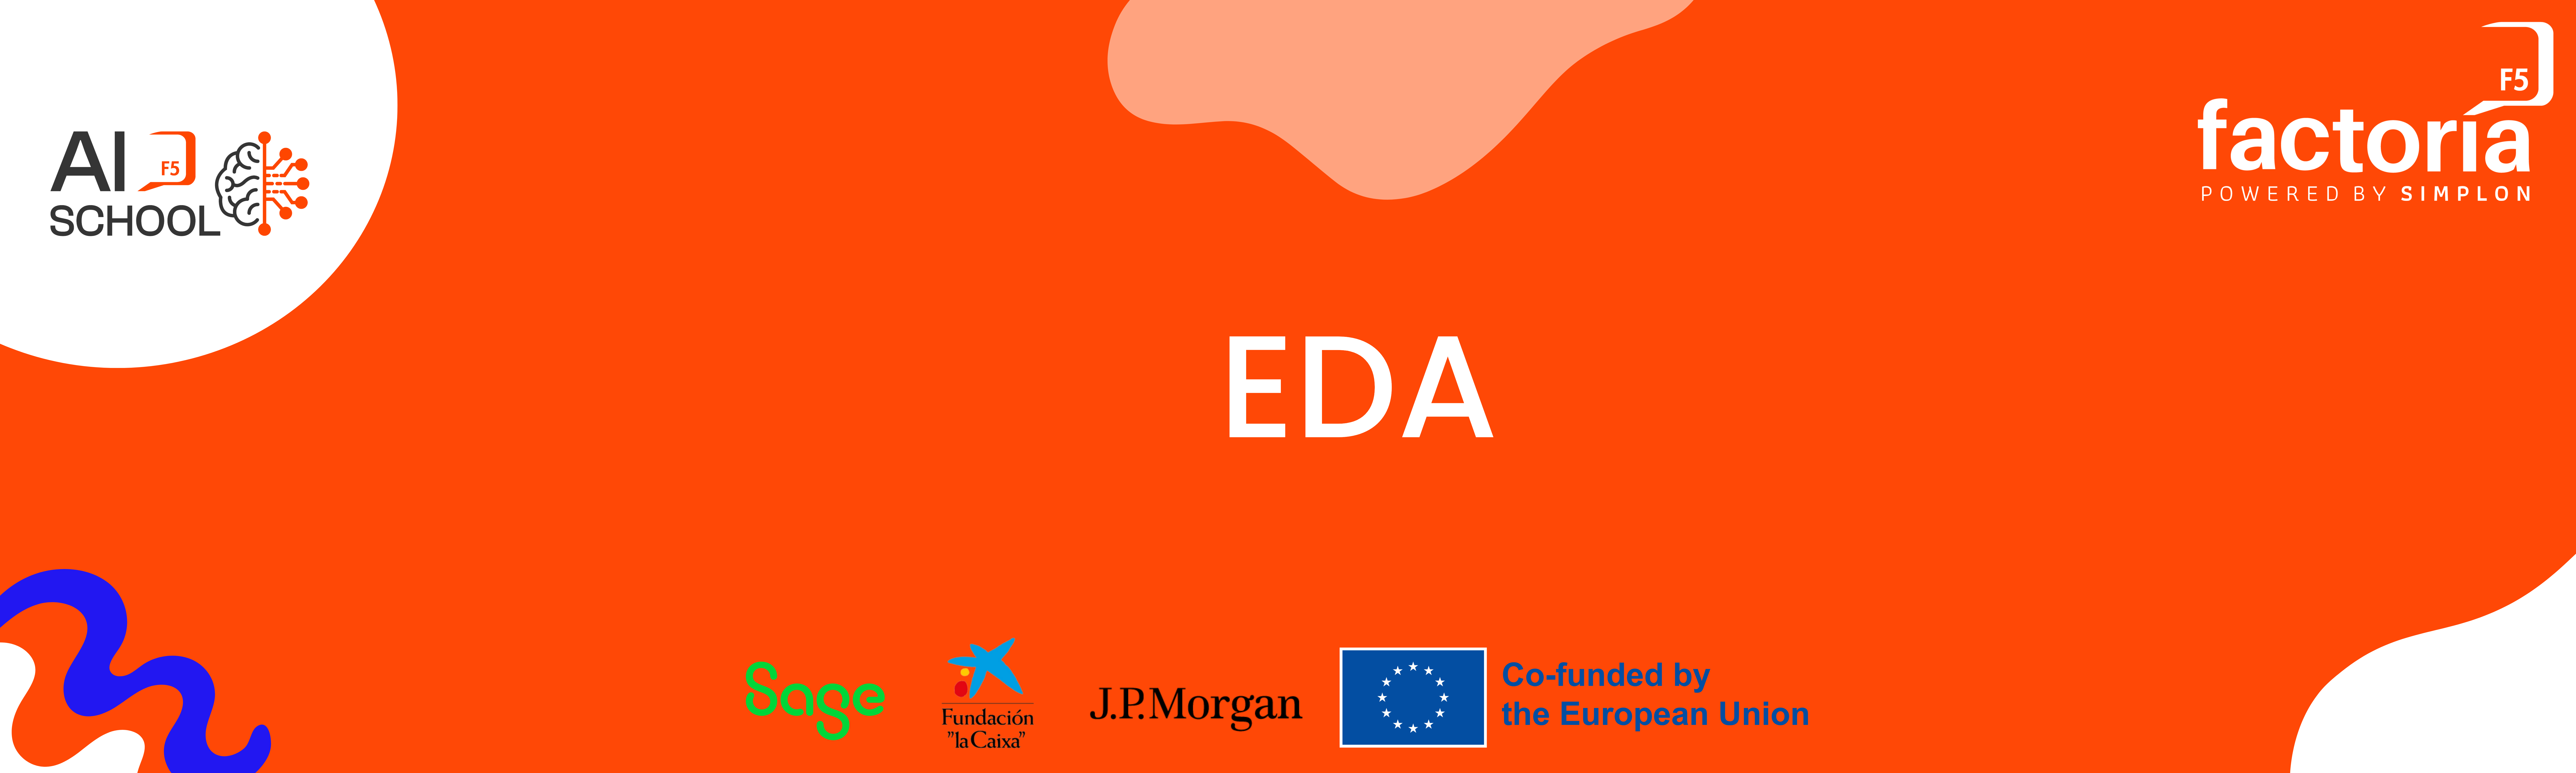

# Análisis Exploratorio de Datos (EDA) - Guía Completa

## 1. Introducción al EDA

El **Análisis Exploratorio de Datos (EDA)** es una fase fundamental en cualquier proyecto de ciencia de datos. Su propósito es comprender a fondo las características y estructuras de los datos antes de aplicar modelos o técnicas avanzadas de análisis.  

El EDA combina métodos estadísticos y visualizaciones gráficas para:

- Identificar patrones y tendencias en los datos.
- Detectar valores atípicos o anomalías.
- Evaluar la distribución de las variables.
- Verificar supuestos y relaciones entre variables.
- Facilitar la toma de decisiones para futuras etapas del análisis.

A través del EDA, los analistas pueden formular hipótesis, detectar problemas en los datos y decidir estrategias para su limpieza y transformación, lo que mejora la calidad de los modelos predictivos y analíticos.  

En esta guía, exploraremos las principales técnicas y herramientas para realizar un análisis exploratorio efectivo.

1. Configuración Inicial

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno


In [ ]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [ ]:
# Cargar el dataset
df = sns.load_dataset('titanic')

In [ ]:
list = sns.get_dataset_names()
list

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# 2. Comprensión Inicial de los Datos  

Esta etapa ayuda a conocer la estructura del conjunto de datos, los tipos de variables y obtener un primer vistazo de estos, lo cual es esencial para identificar posibles problemas y tomar decisiones informadas sobre cómo proceder con el análisis.  


### 2.1. Estructura del Dataset  

La estructura del dataset se refiere a cómo están organizados los datos y su formato general. Al comprender la estructura, podemos saber qué esperar de ellos y cómo acceder a la información necesaria.  

- **Filas y columnas**: Es importante verificar cuántas filas (registros) y columnas (características) contiene el conjunto de datos. Esto se puede hacer con la función `df.shape` en Pandas.  
- **Nombres de las columnas**: Identificar los nombres de las columnas es clave para saber qué variables se están analizando. Se puede visualizar con `df.columns`.  
- **Tamaño y dimensiones**: Si los datos son grandes, es útil comprobar las primeras filas o una muestra aleatoria para conocer la "dimensión" de los datos sin sobrecargar la memoria. Se puede usar `df.head()` o `df.sample()`.  
- **Tipo de archivo**: El dataset puede estar en varios formatos, como CSV, Excel, JSON, SQL, etc. Es importante saber cómo leerlo y cargarlo correctamente dependiendo de su formato.  

### 2.2. Tipos de Variables  

Comprender los tipos de variables es esencial para elegir las técnicas y herramientas correctas para su análisis. Las variables pueden clasificarse en:  

- **Variables Categóricas**: Son aquellas que representan categorías o grupos y pueden ser de tipo *nominal* (sin orden, como colores o género) o *ordinal* (con un orden, como niveles de educación).  
  - Ejemplo: Género, Estado civil, Categorías de productos.  
  - Para visualizarlas, se usan gráficos como gráficos de barras o diagramas de cajas.  

- **Variables Numéricas**: Son aquellas que representan cantidades y pueden ser *discretas* (números enteros) o *continuas* (valores en un rango continuo, como medidas de peso o altura).  
  - Ejemplo: Edad, Ingreso, Temperatura.  
  - Se analizan con estadísticas descriptivas y representaciones gráficas como histogramas o diagramas de dispersión.  

- **Variables Temporales**: Representan información relacionada con fechas y horas, como fechas de nacimiento o fecha de compra.  
  - Ejemplo: Fecha de venta, Hora de registro.  
  - Se analizan con series temporales o se pueden descomponer en componentes como día, mes o año.  

- **Variables Booleanas**: Son aquellas que solo tienen dos valores posibles, como *verdadero/falso* o *sí/no*.  
  - Ejemplo: ¿Cliente activo? - si/no
  - Se pueden visualizar con gráficos de barras o proporciones.  

### 2.3. Primer Vistazo a los Datos  

Un primer vistazo a los datos nos permite verificar la calidad de la información y detectar posibles problemas. Aquí algunos pasos iniciales a realizar:  

- **Revisión de las primeras filas**: Obtener un resumen rápido de los primeros registros del dataset usando `df.head()`. Esto muestra las primeras filas y ayuda a detectar posibles problemas como datos mal ingresados.  
- **Revisión de tipos de datos**: Verificar que los tipos de datos de cada columna sean correctos (por ejemplo, asegurarse de que las fechas estén en formato de fecha). Se puede hacer con `df.dtypes`.  
- **Valores faltantes**: Identificar columnas con valores faltantes usando `df.isnull().sum()`. Esto puede ayudar a identificar si es necesario imputar o eliminar datos.  
- **Estadísticas descriptivas**: Obtener un resumen de las estadísticas básicas (media, mediana, desviación estándar, etc.) con `df.describe()`. Esto es útil para detectar anomalías o valores atípicos de forma temprana.   

In [ ]:
# Primeras filas del dataset
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# Información sobre tipos de datos y valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Estadísticas descriptivas básicas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 891 filas y 15 columnas


# 3. Análisis de Valores Faltantes  

En cualquier conjunto de datos, la presencia de valores faltantes es un problema común que puede afectar la calidad del análisis y la precisión de los modelos predictivos. Es fundamental identificar, visualizar y aplicar estrategias adecuadas para manejar estos datos de manera efectiva.

### 3.1. Identificación de Datos Faltantes  

Antes de abordar los valores faltantes, es necesario detectar su presencia y comprender su distribución dentro del dataset. Algunas técnicas para identificarlos incluyen:  

- **Resumen estadístico**: Uso de métodos como `.isnull().sum()` en pandas para contar valores nulos en cada columna.  
- **Análisis de porcentaje de valores faltantes**: Calcular el porcentaje de valores ausentes por variable para evaluar su impacto.  
- **Exploración de patrones**: Identificar si los datos faltantes ocurren de manera aleatoria o siguen un patrón específico.  

### 3.2. Visualización de Patrones de Valores Faltantes  

Visualizar los datos faltantes ayuda a comprender mejor su distribución y posible impacto en el análisis. Algunas herramientas útiles incluyen:  

- **Matriz de valores faltantes**: Gráficos como los generados por `msno.matrix()` (de la librería `missingno`) permiten ver dónde se concentran los datos ausentes.  
- **Heatmaps**: Usar `seaborn.heatmap()` para destacar áreas con valores nulos.  
- **Diagramas de barras**: Representar la cantidad de valores faltantes en cada variable con `msno.bar()`.  

### 3.3. Estrategias para Manejar Valores Faltantes  

Dependiendo del contexto y la naturaleza de los datos, existen varias estrategias para abordar los valores faltantes:  

- **Eliminación de datos**  
  - *Eliminar filas*: Útil si el porcentaje de valores faltantes es bajo.  
  - *Eliminar columnas*: Se considera cuando una variable tiene demasiados valores nulos y aporta poca información.  

- **Imputación de valores**  
  - *Sustitución con medidas estadísticas*: Reemplazo por la media, mediana o moda.  
  - *Interpolación*: Relleno basado en tendencias de los datos.  
  - *Modelos predictivos*: Uso de algoritmos como KNN o regresión para estimar valores perdidos.  

- **Marcado de valores faltantes**  
  - Crear una nueva variable indicadora (flag) para señalar si un valor estaba ausente, lo que puede ser útil en modelos de machine learning.

In [ ]:
# Cantidad de valores faltantes por columna
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


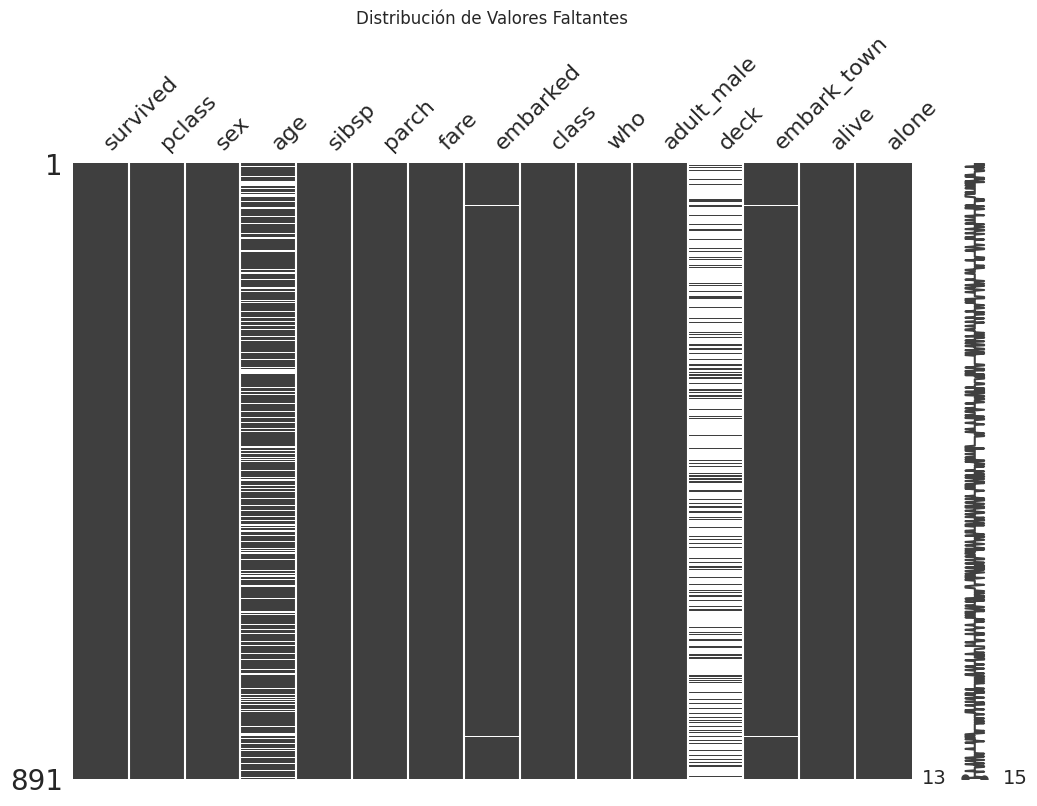

In [ ]:
# Visualización de valores faltantes
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()


In [ ]:
# Porcentaje de valores faltantes
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467
class,0.000000
who,0.000000


# 4. Análisis Univariado  

El **análisis univariado** es el primer paso en la exploración de datos y se centra en examinar cada variable individualmente. Su objetivo es comprender la distribución, tendencia central y dispersión de los datos, además de identificar posibles valores atípicos.  

### 4.1. Distribución de Variables Individuales  

El análisis de la distribución de una variable ayuda a entender cómo se comportan los datos y si siguen una forma específica, como una distribución normal, uniforme o sesgada. Algunas técnicas clave incluyen:  

- **Histogramas**: Muestran la frecuencia de los valores en intervalos específicos, proporcionando una visión general de la forma de la distribución. Se pueden generar con `matplotlib.hist()` o `seaborn.histplot()`.  
- **Gráficos de densidad (KDE)**: Una alternativa más suave a los histogramas que usa funciones de estimación de densidad de kernel para visualizar la distribución (`seaborn.kdeplot()`).  
- **Boxplots**: Ayudan a identificar la mediana, cuartiles y valores atípicos de la distribución de una variable (`seaborn.boxplot()`).  

### 4.2. Medidas de Tendencia Central y Dispersión  

Las estadísticas descriptivas permiten resumir los datos y entender su comportamiento general. Entre las más importantes están:  

- **Medidas de tendencia central**  
  - *Media (\(\mu\))*: Promedio de los valores de la variable.  
  - *Mediana*: Valor central cuando los datos están ordenados, útil para distribuciones sesgadas.  
  - *Moda*: Valor más frecuente en la distribución.  

- **Medidas de dispersión**  
  - *Varianza (\(\sigma^2\))*: Indica qué tan dispersos están los datos respecto a la media.  
  - *Desviación estándar (\(\sigma\))*: Raíz cuadrada de la varianza, mide la dispersión en las mismas unidades que los datos.  
  - *Rango intercuartílico (IQR)*: Diferencia entre el tercer y el primer cuartil (\(Q3 - Q1\)), útil para detectar outliers.  

### 4.3. Identificación de Outliers  

Los valores atípicos pueden distorsionar el análisis y afectar la precisión de los modelos. Algunas técnicas para detectarlos incluyen:  

- **Método del rango intercuartílico (IQR)**  
  - Se consideran outliers los valores que están por debajo de \(Q1 - 1.5 \times IQR\) o por encima de \(Q3 + 1.5 \times IQR\).  
  - Se pueden visualizar con boxplots.  

- **Z-score (puntaje Z)**  
  - Mide cuántas desviaciones estándar se aleja un dato de la media.  
  - Se usa el criterio de valores absolutos mayores a 3 para identificar outliers.  

- **Gráficos de dispersión (scatter plots)**  
  - Permiten observar puntos anómalos en distribuciones numéricas.

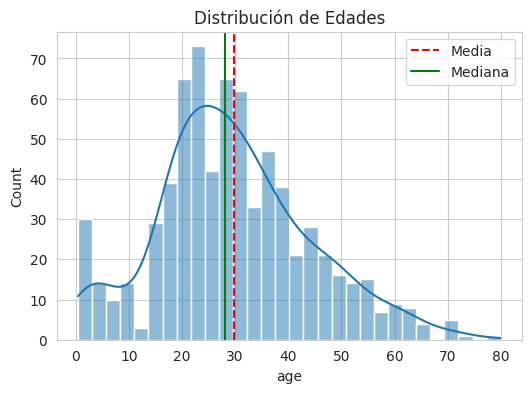

In [ ]:
 sns.histplot(df["age"], kde=True, bins=30)
 plt.title("Distribución de Edades")
 plt.axvline(df["age"].mean(), color='r', linestyle='--', label='Media')
 plt.axvline(df["age"].median(), color='g', linestyle='-', label='Mediana')
 plt.legend()
 plt.show()

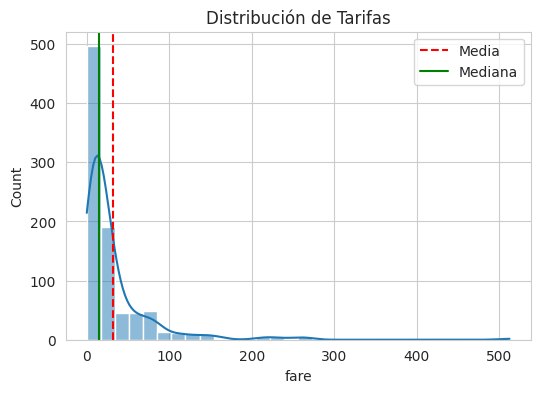

In [ ]:
 sns.histplot(df["fare"], kde=True, bins=30)
 plt.title("Distribución de Tarifas")
 plt.axvline(df["fare"].mean(), color='r', linestyle='--', label='Media')
 plt.axvline(df["fare"].median(), color='g', linestyle='-', label='Mediana')
 plt.legend()
 plt.show()

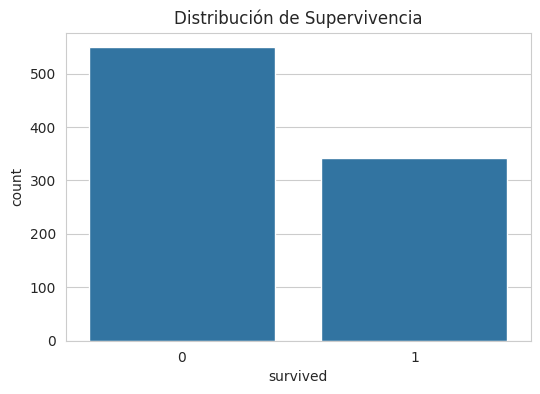

In [ ]:
sns.countplot(x="survived", data=df)
plt.title("Distribución de Supervivencia")
plt.show()

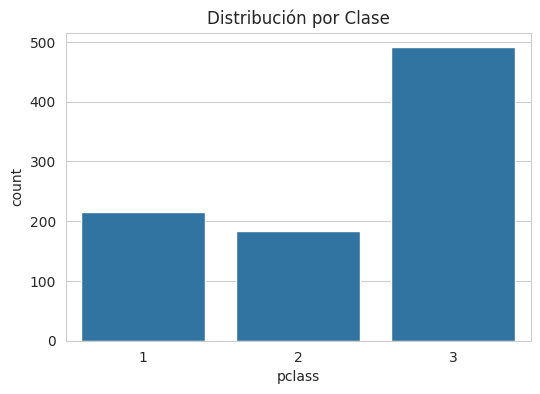

In [ ]:
 sns.countplot(x="pclass", data=df)
 plt.title("Distribución por Clase")
 plt.show()

# 5. Análisis Bivariado y Multivariado  

El **análisis bivariado y multivariado** se centra en estudiar las relaciones entre dos o más variables dentro de un conjunto de datos. Mientras que el análisis bivariado examina la relación entre dos variables, el análisis multivariado permite comprender interacciones más complejas entre múltiples variables.  

### 5.1. Relaciones entre Variables  

El primer paso en el análisis bivariado y multivariado es determinar si existe una relación entre las variables y qué tipo de relación presentan:  

- **Relaciones entre variables numéricas**  
  - Gráficos de dispersión (*scatter plots*): Útiles para visualizar relaciones lineales o no lineales.  
  - Diagramas de hexbin o *pair plots* con `seaborn.pairplot()` para detectar patrones.  

- **Relaciones entre una variable categórica y una numérica**  
  - Boxplots y violin plots: Comparan la distribución de una variable numérica dentro de diferentes categorías.  
  - Diagramas de barras (*bar plots*): Comparan promedios o medianas entre grupos.  

- **Relaciones entre variables categóricas**  
  - Tablas de contingencia y gráficos de barras apiladas para visualizar distribuciones conjuntas.  

### 5.2. Correlaciones  

La **correlación** mide la relación lineal entre dos variables numéricas y se expresa en valores entre -1 y 1:  

- **Coeficiente de correlación de Pearson**:  
  - Evalúa la relación lineal entre dos variables continuas.  
  - Se calcula con `df.corr(method='pearson')` en pandas.  

- **Coeficiente de correlación de Spearman**:  
  - Se usa para relaciones monótonas (no necesariamente lineales).  
  - Se calcula con `df.corr(method='spearman')`.  

- **Mapa de calor de correlación**  
  - Se utiliza `seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')` para visualizar correlaciones de múltiples variables.  

### 5.3. Comparación entre Grupos  

Cuando se trabaja con datos categóricos y numéricos, es importante comparar los diferentes grupos para identificar diferencias significativas:  

- **Pruebas estadísticas**  
  - *T-test*: Compara la media de dos grupos para determinar si son significativamente diferentes.  
  - *ANOVA*: Evalúa diferencias entre más de dos grupos.  
  - *Chi-cuadrado*: Determina si hay asociación entre variables categóricas.  

- **Visualizaciones útiles**  
  - Boxplots y violin plots para comparar la distribución entre grupos.  
  - Gráficos de barras y conteo (`seaborn.countplot()`) para variables categóricas.


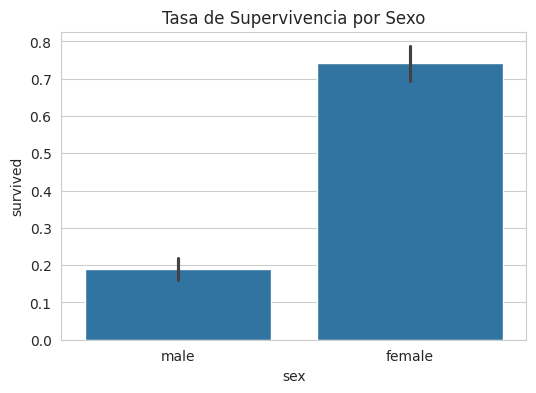

In [ ]:
sns.barplot(x="sex", y="survived", data=df)
plt.title("Tasa de Supervivencia por Sexo")
plt.show()

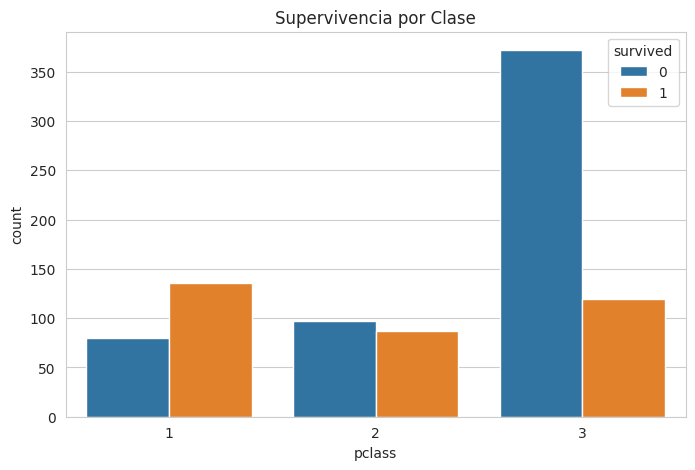

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Supervivencia por Clase')
plt.show()

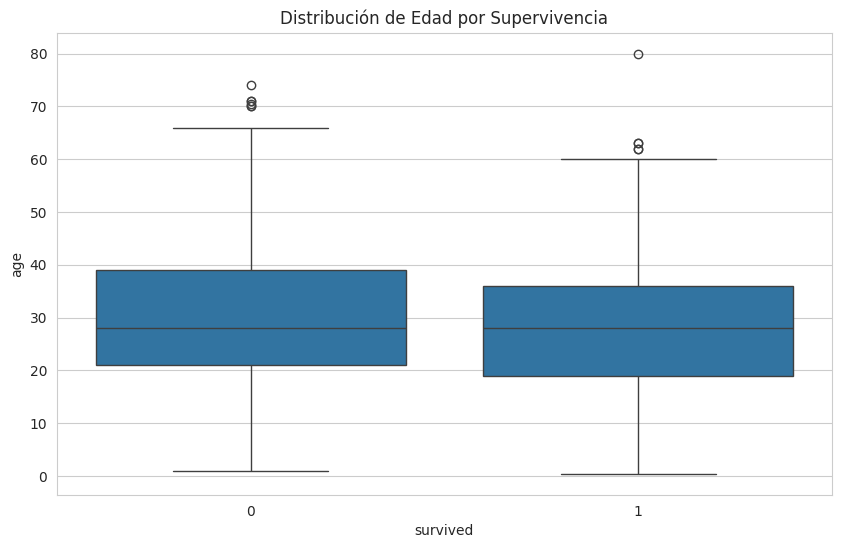

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Distribución de Edad por Supervivencia')
plt.show()

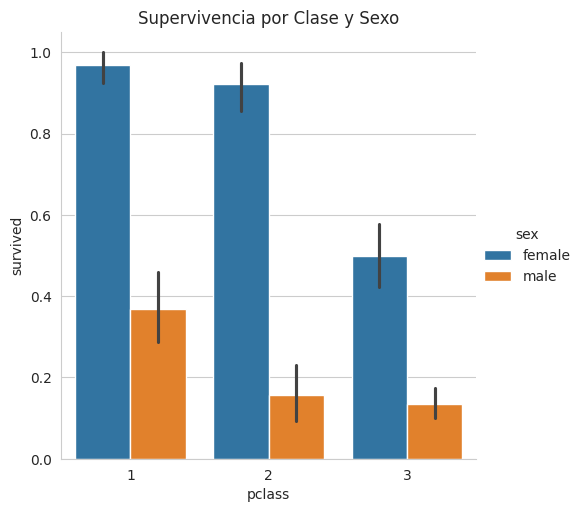

In [ ]:
 # Análisis Multivariado
 sns.catplot(x="pclass", y="survived", hue="sex", kind="bar", data=df)
 plt.title("Supervivencia por Clase y Sexo")
 plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

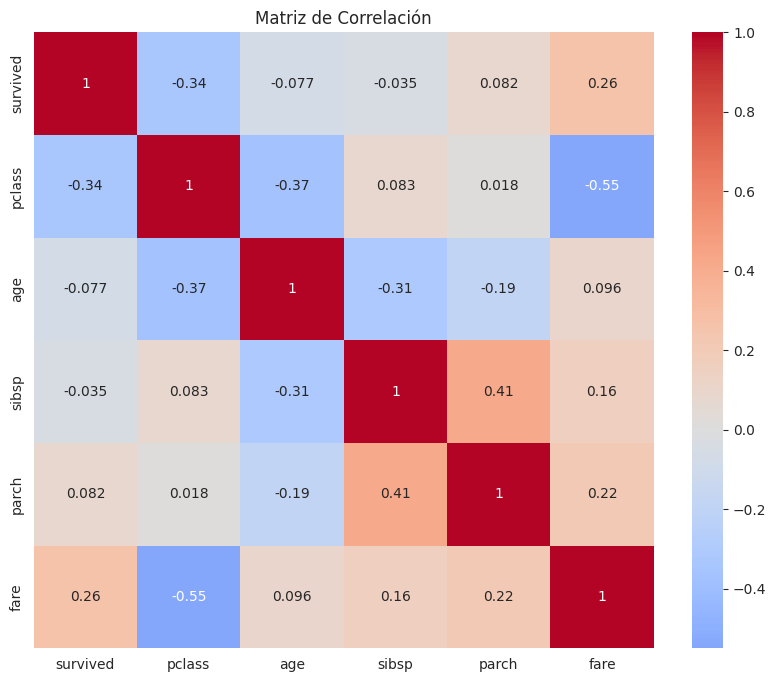

In [ ]:
# Matriz de correlación para variables numéricas
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

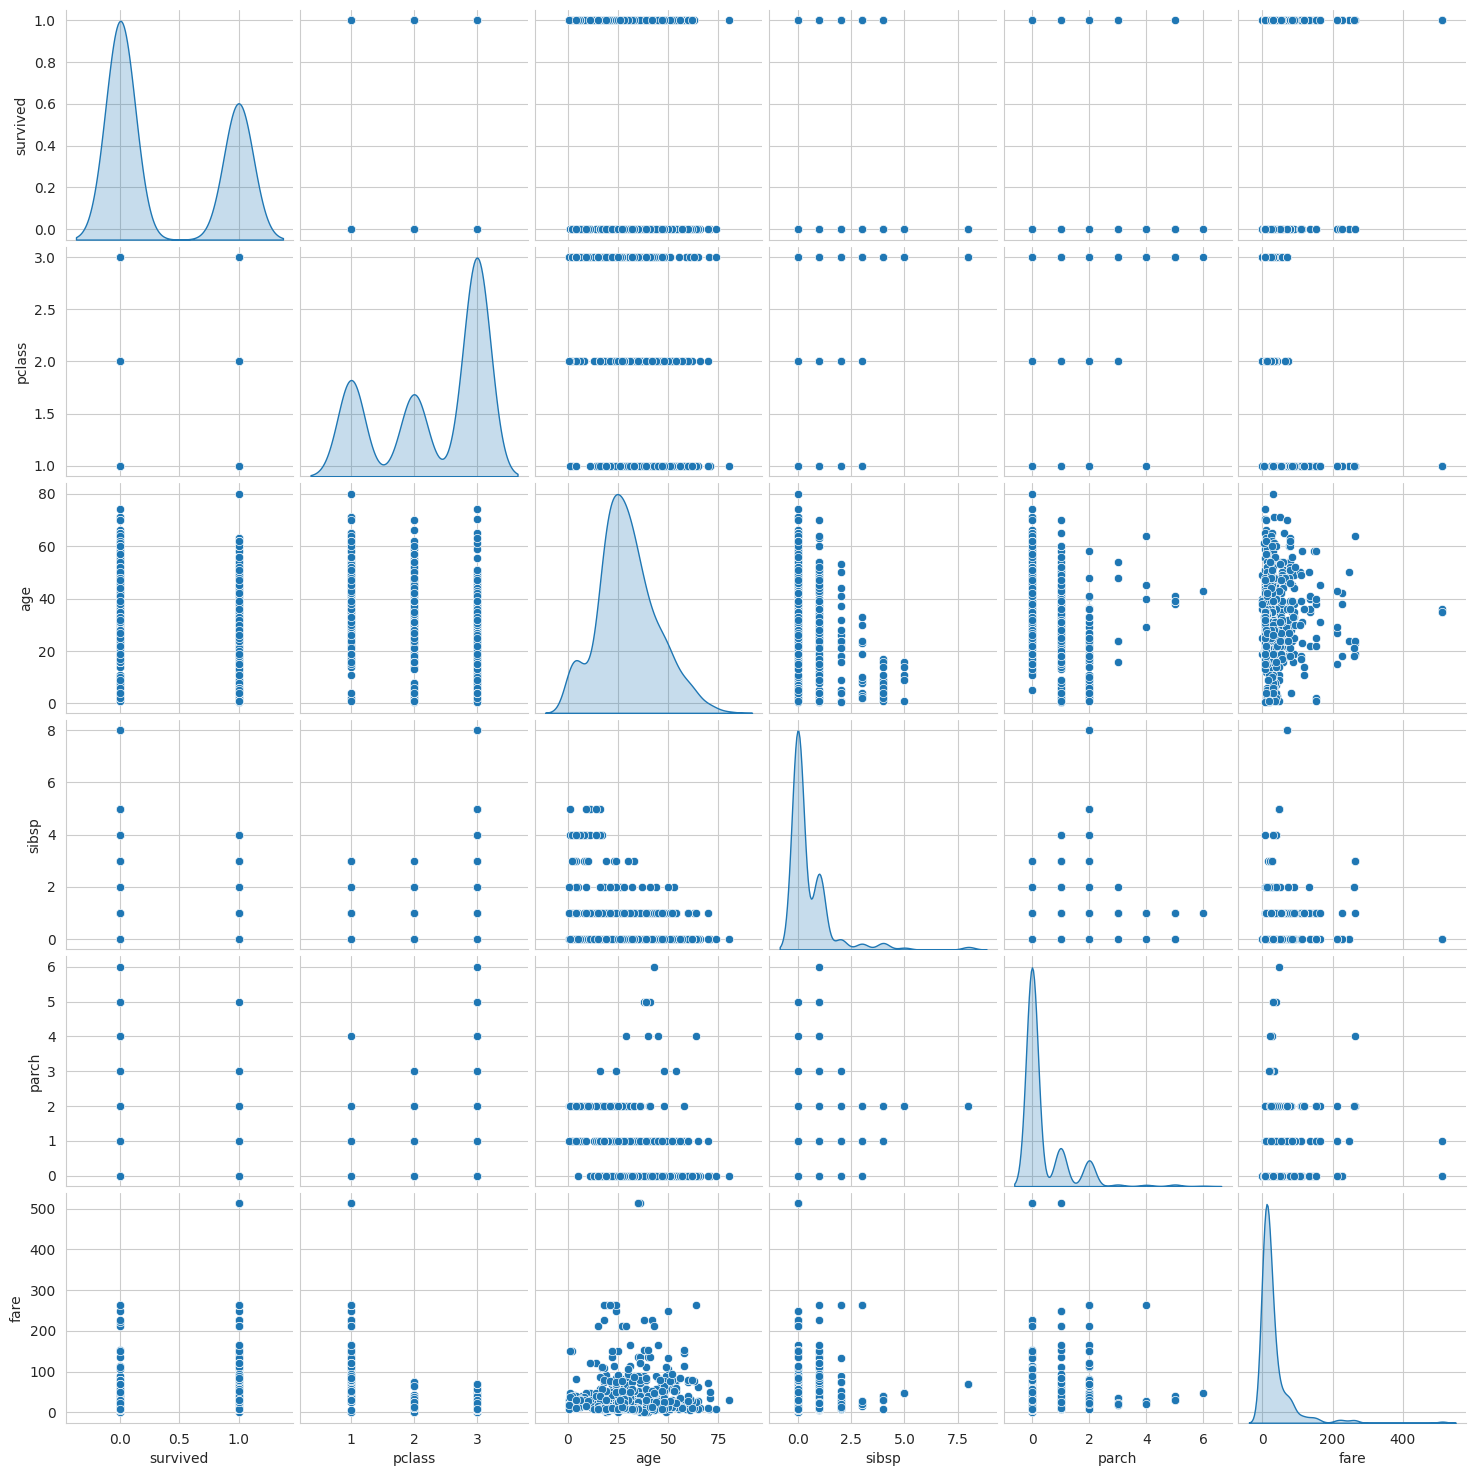

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Relación entre variables numéricas

sns.pairplot(df[num_cols], diag_kind='kde')
plt.figure(figsize=(10, 8))
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.show()

In [ ]:
relevant_num_cols = ['Age', 'Fare', 'Pclass']
relevant_cat_cols = ['Sex', 'Survived', 'Embarked']

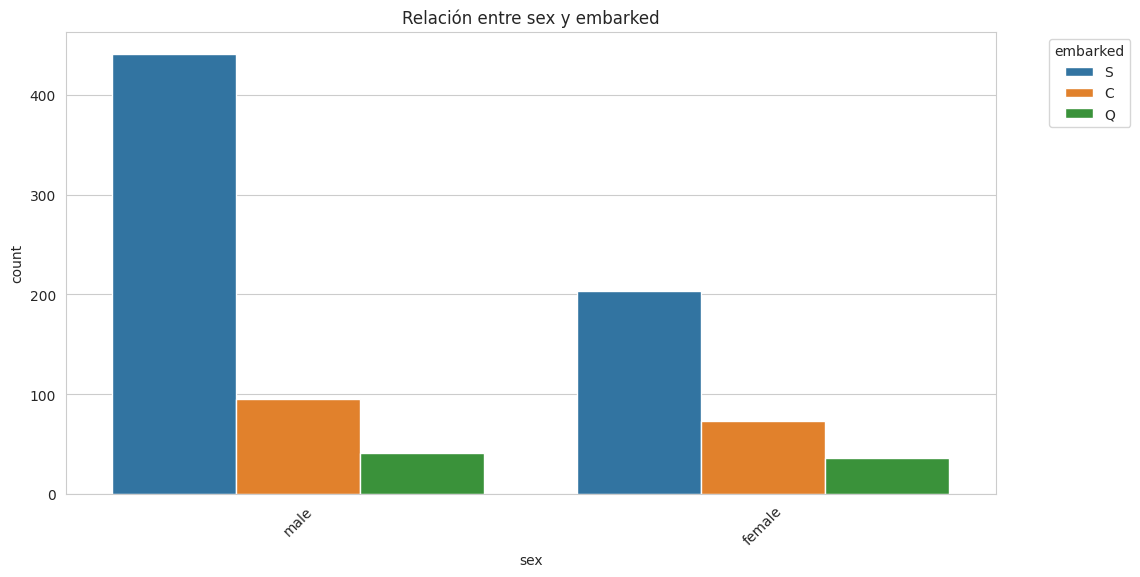


Tabla de contingencia entre sex y embarked:
embarked   C   Q    S
sex                  
female    73  36  203
male      95  41  441


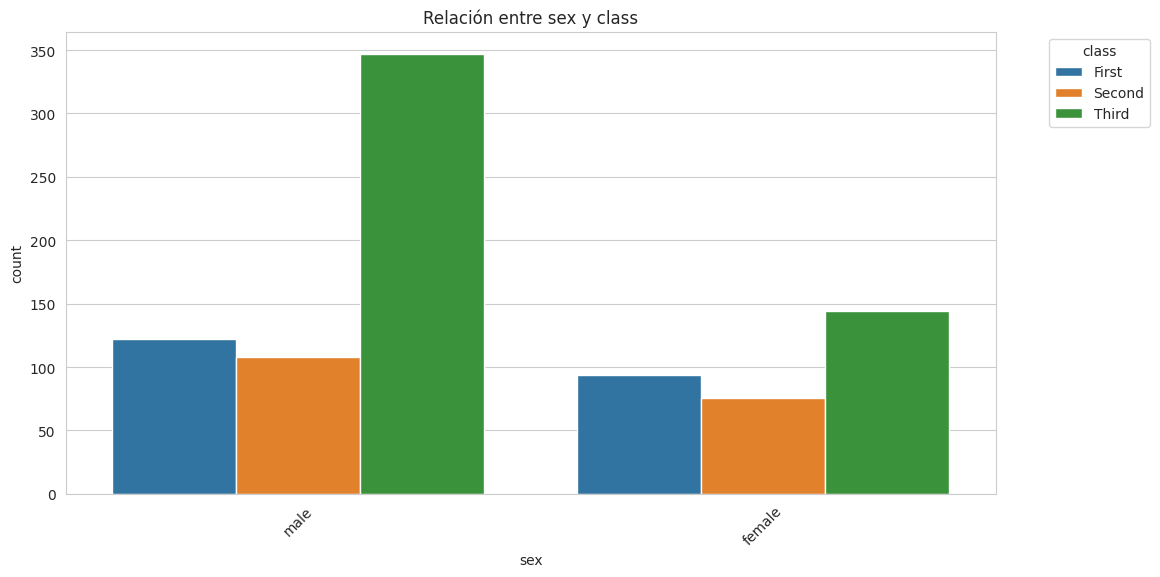


Tabla de contingencia entre sex y class:
class   First  Second  Third
sex                         
female     94      76    144
male      122     108    347


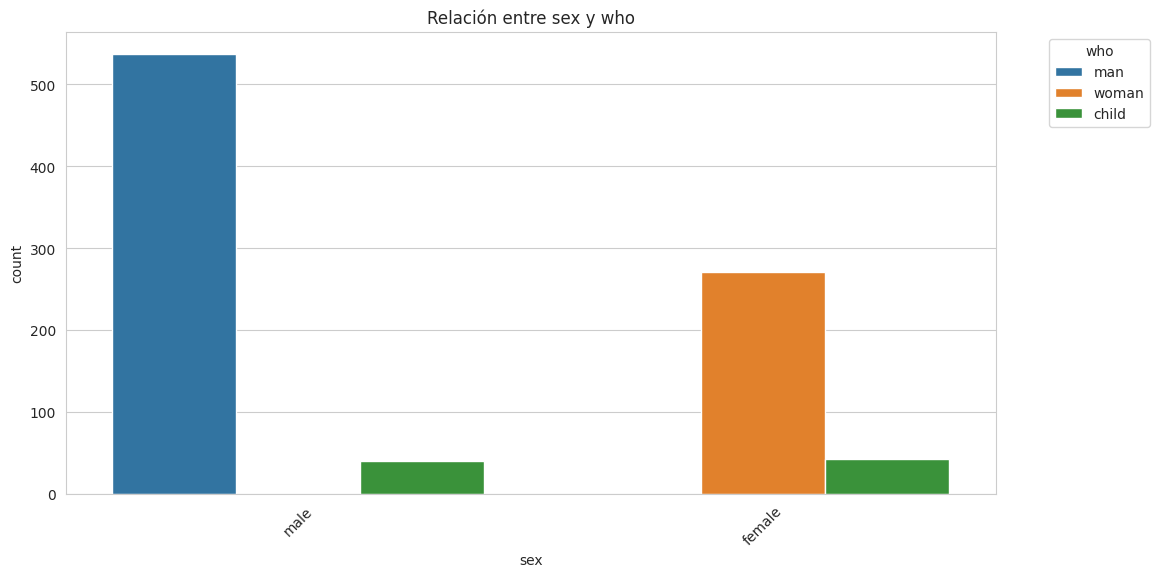


Tabla de contingencia entre sex y who:
who     child  man  woman
sex                      
female     43    0    271
male       40  537      0


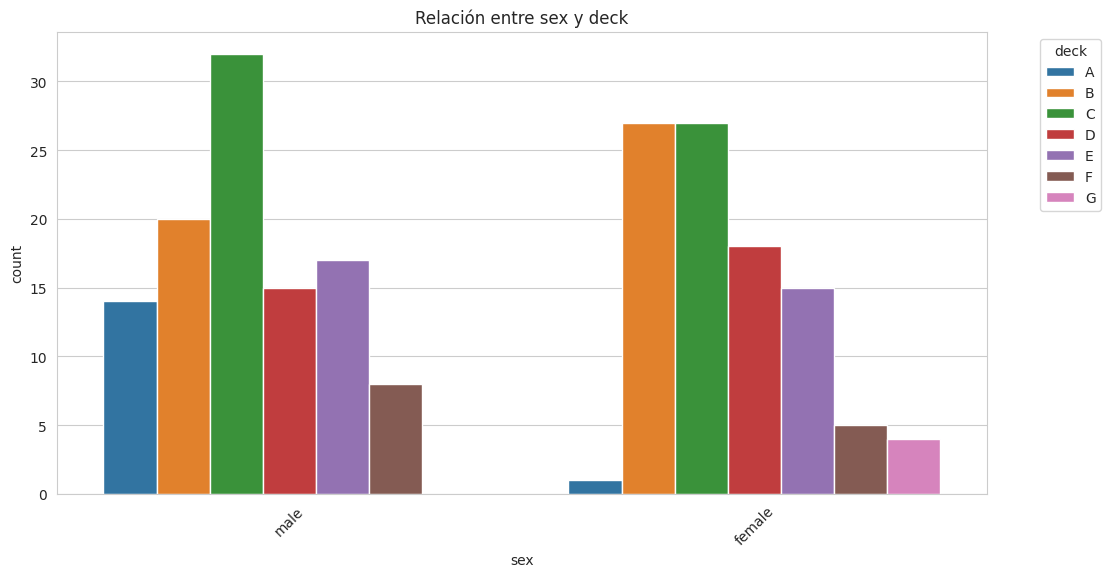


Tabla de contingencia entre sex y deck:
deck     A   B   C   D   E  F  G
sex                             
female   1  27  27  18  15  5  4
male    14  20  32  15  17  8  0


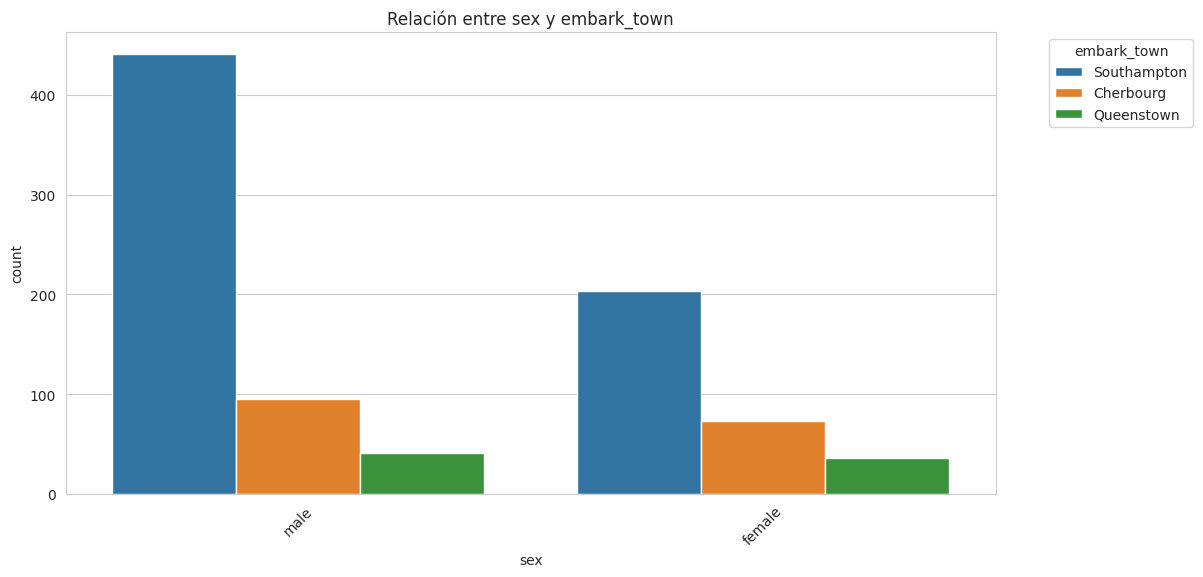


Tabla de contingencia entre sex y embark_town:
embark_town  Cherbourg  Queenstown  Southampton
sex                                            
female              73          36          203
male                95          41          441


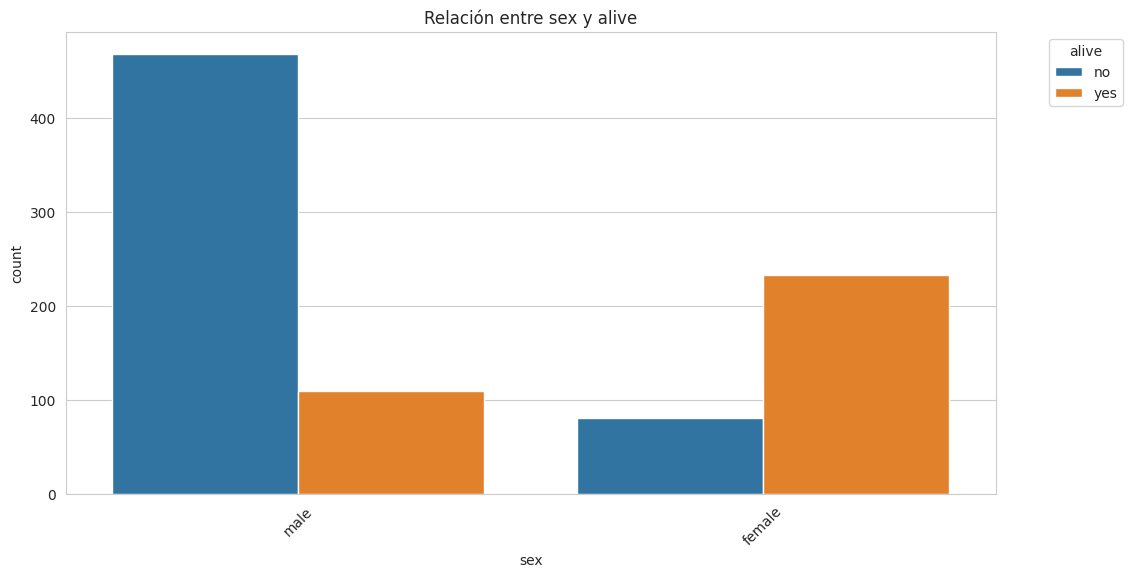


Tabla de contingencia entre sex y alive:
alive    no  yes
sex             
female   81  233
male    468  109


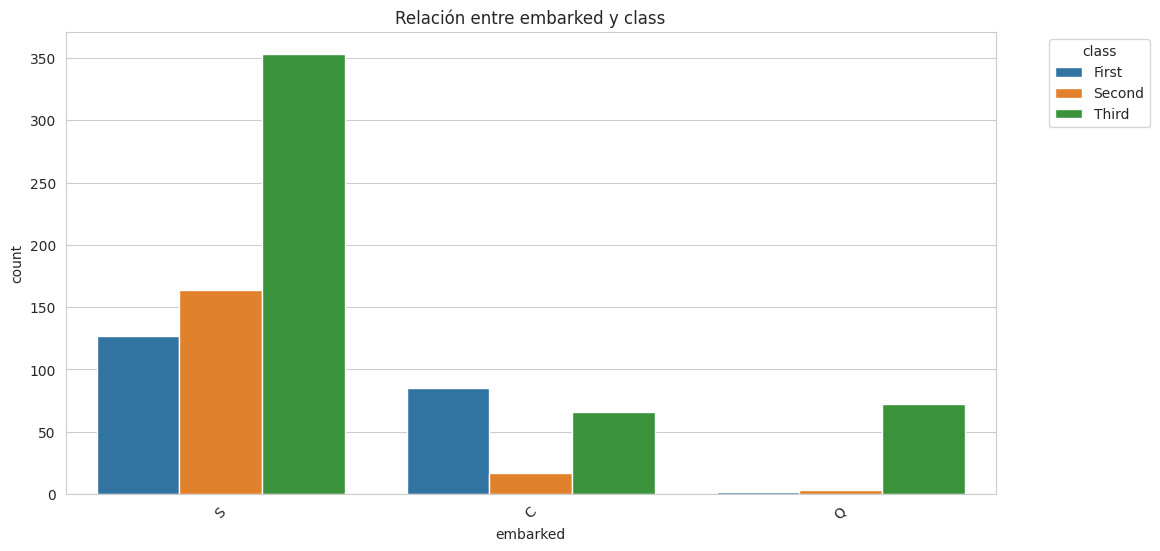


Tabla de contingencia entre embarked y class:
class     First  Second  Third
embarked                      
C            85      17     66
Q             2       3     72
S           127     164    353


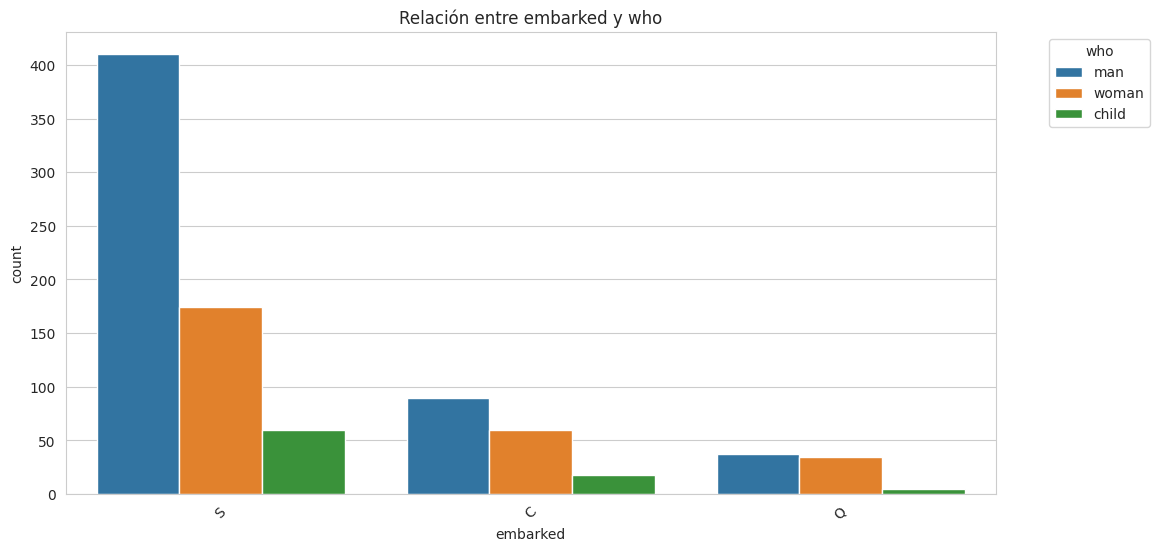


Tabla de contingencia entre embarked y who:
who       child  man  woman
embarked                   
C            18   90     60
Q             5   37     35
S            60  410    174


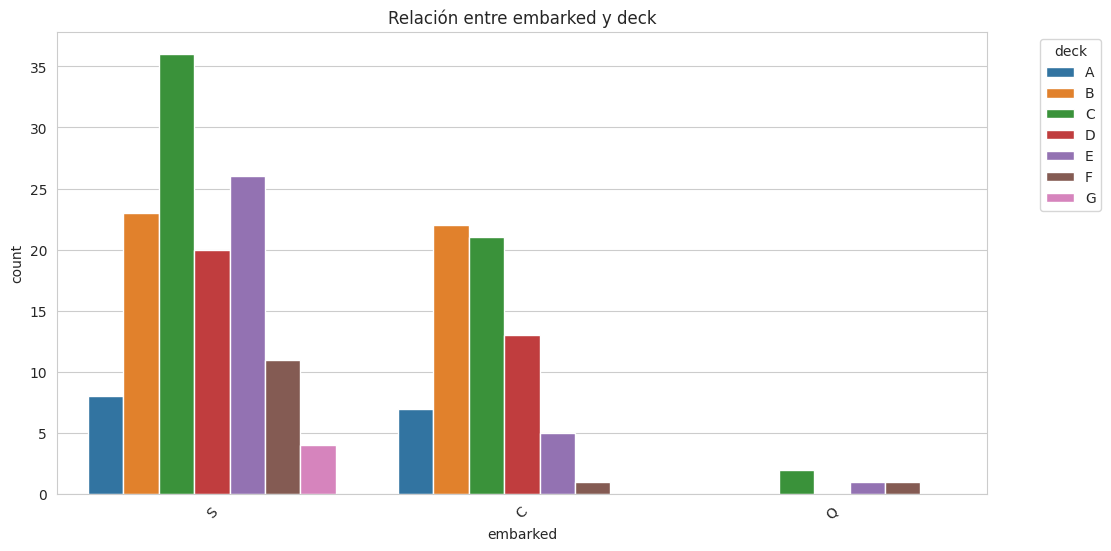


Tabla de contingencia entre embarked y deck:
deck      A   B   C   D   E   F  G
embarked                          
C         7  22  21  13   5   1  0
Q         0   0   2   0   1   1  0
S         8  23  36  20  26  11  4


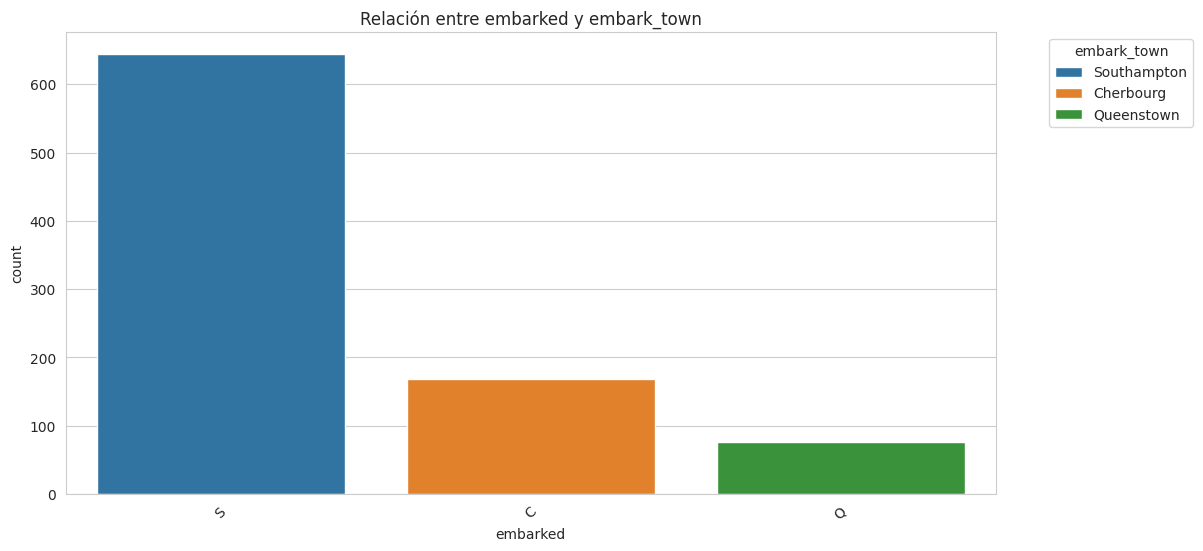


Tabla de contingencia entre embarked y embark_town:
embark_town  Cherbourg  Queenstown  Southampton
embarked                                       
C                  168           0            0
Q                    0          77            0
S                    0           0          644


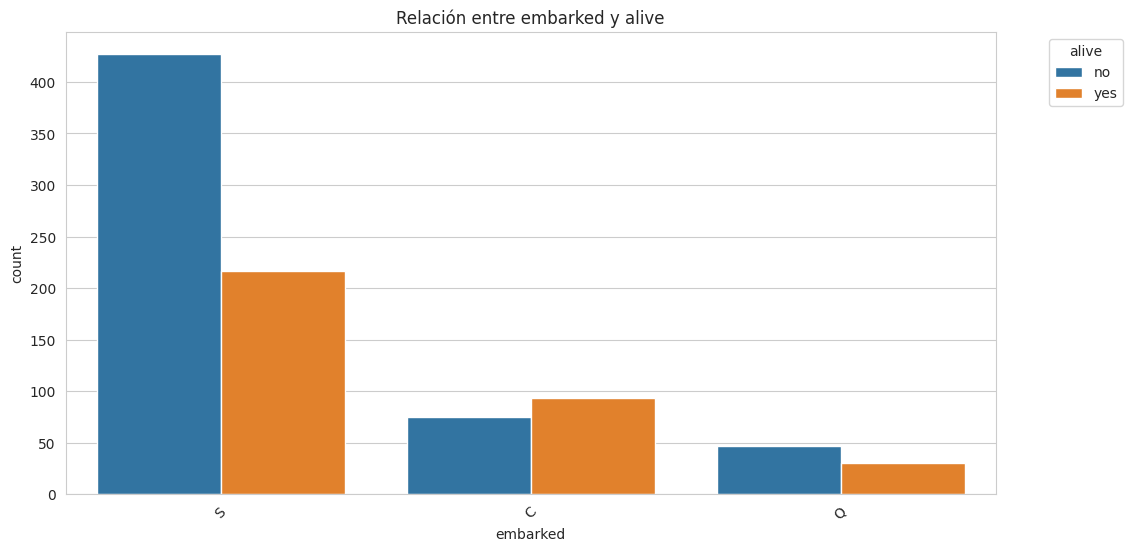


Tabla de contingencia entre embarked y alive:
alive      no  yes
embarked          
C          75   93
Q          47   30
S         427  217


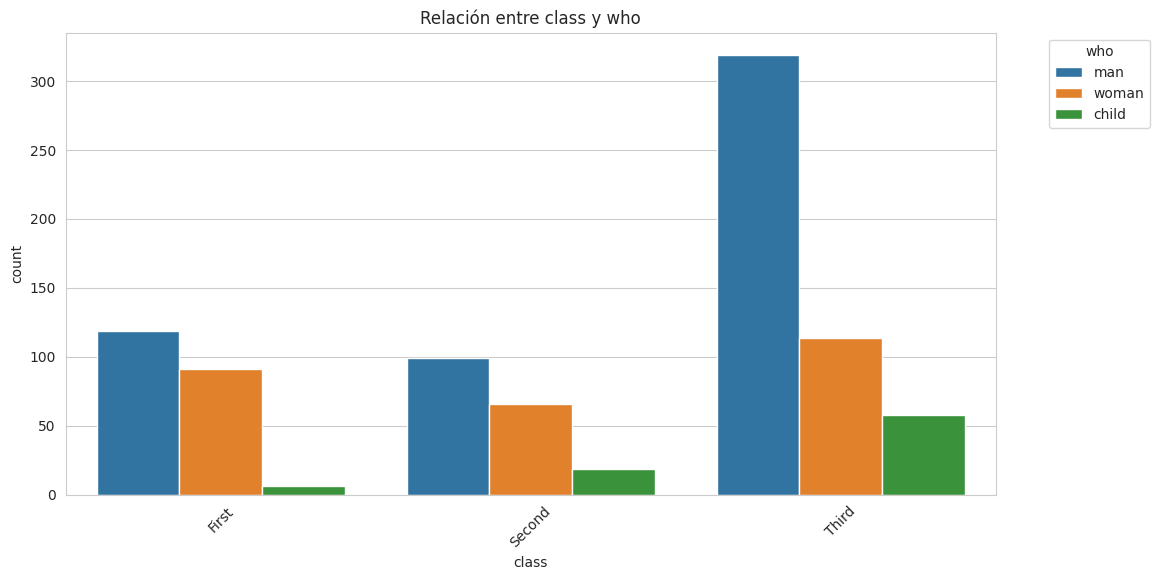


Tabla de contingencia entre class y who:
who     child  man  woman
class                    
First       6  119     91
Second     19   99     66
Third      58  319    114


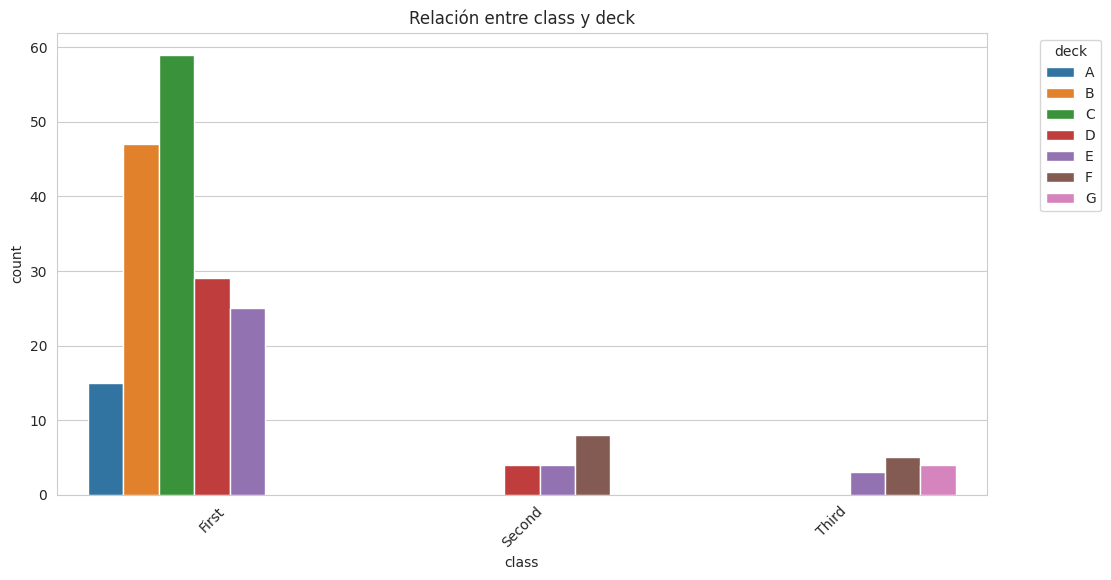


Tabla de contingencia entre class y deck:
deck     A   B   C   D   E  F  G
class                           
First   15  47  59  29  25  0  0
Second   0   0   0   4   4  8  0
Third    0   0   0   0   3  5  4


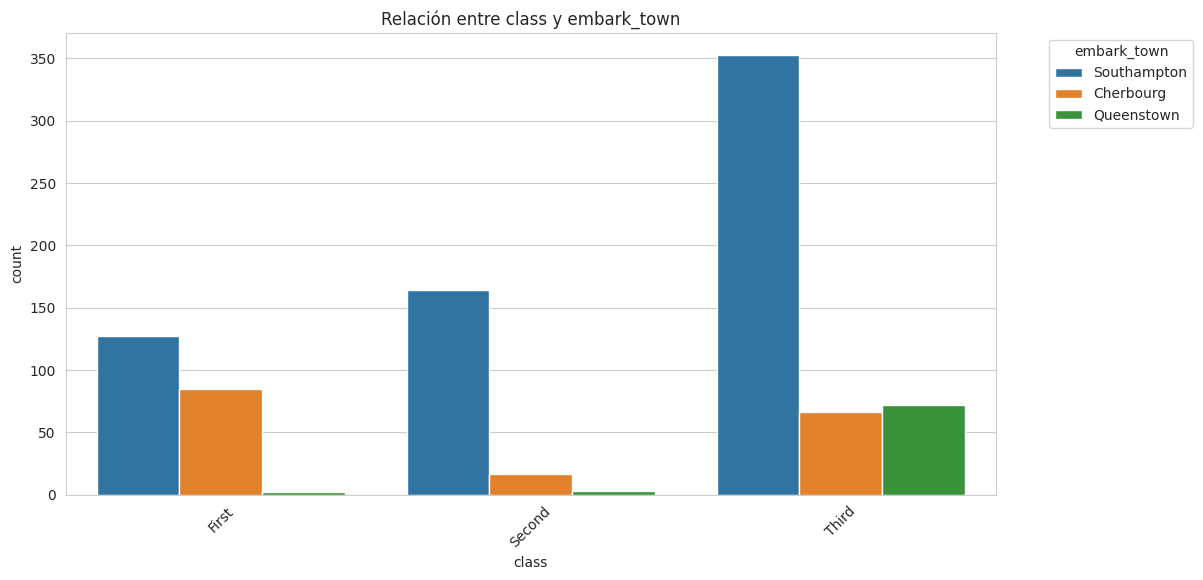


Tabla de contingencia entre class y embark_town:
embark_town  Cherbourg  Queenstown  Southampton
class                                          
First               85           2          127
Second              17           3          164
Third               66          72          353


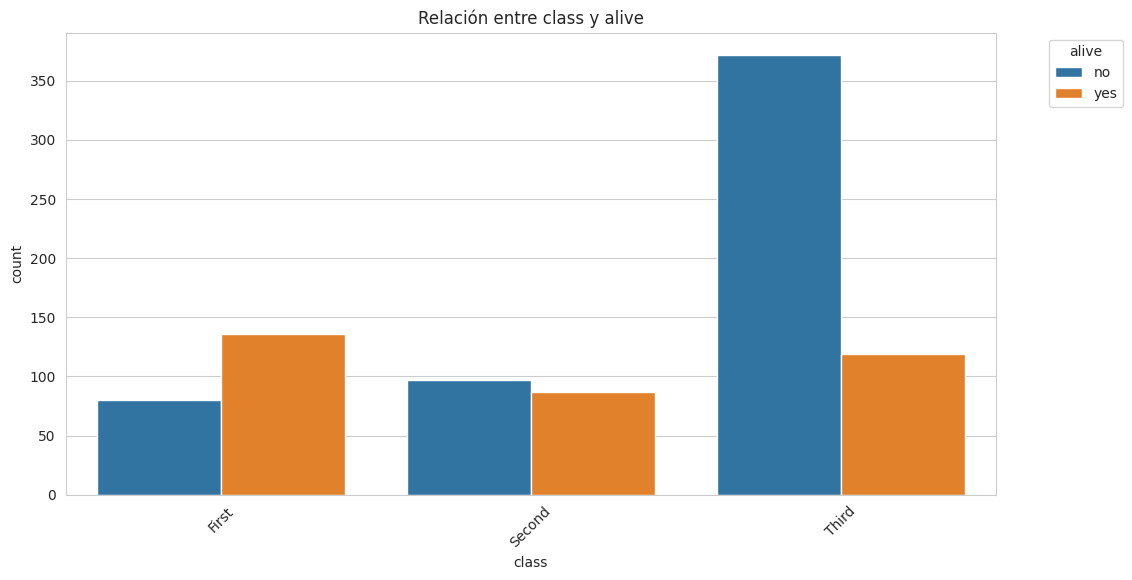


Tabla de contingencia entre class y alive:
alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119


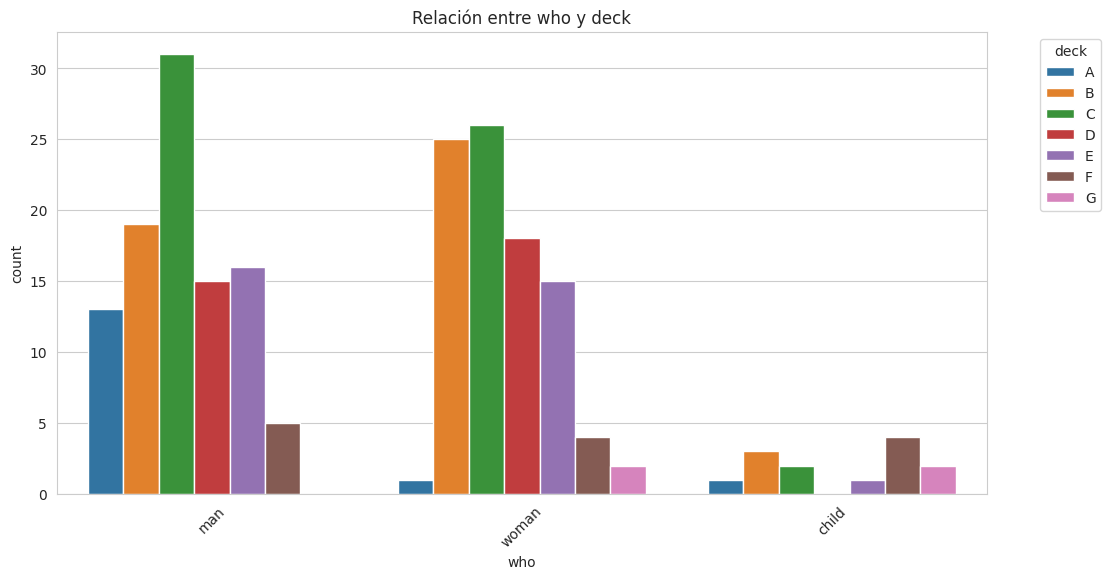


Tabla de contingencia entre who y deck:
deck    A   B   C   D   E  F  G
who                            
child   1   3   2   0   1  4  2
man    13  19  31  15  16  5  0
woman   1  25  26  18  15  4  2


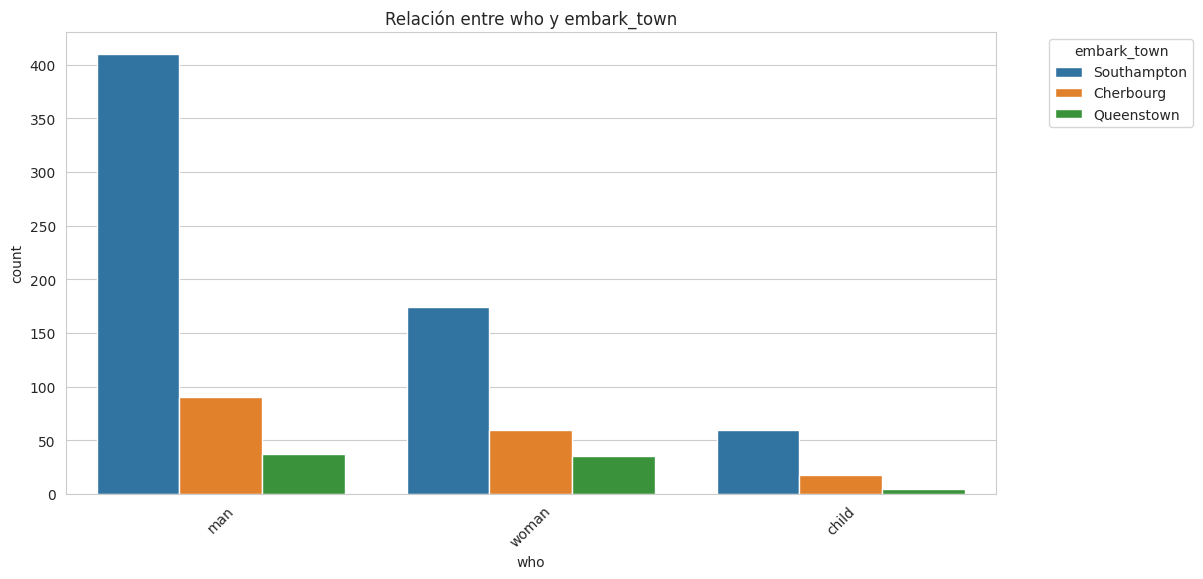


Tabla de contingencia entre who y embark_town:
embark_town  Cherbourg  Queenstown  Southampton
who                                            
child               18           5           60
man                 90          37          410
woman               60          35          174


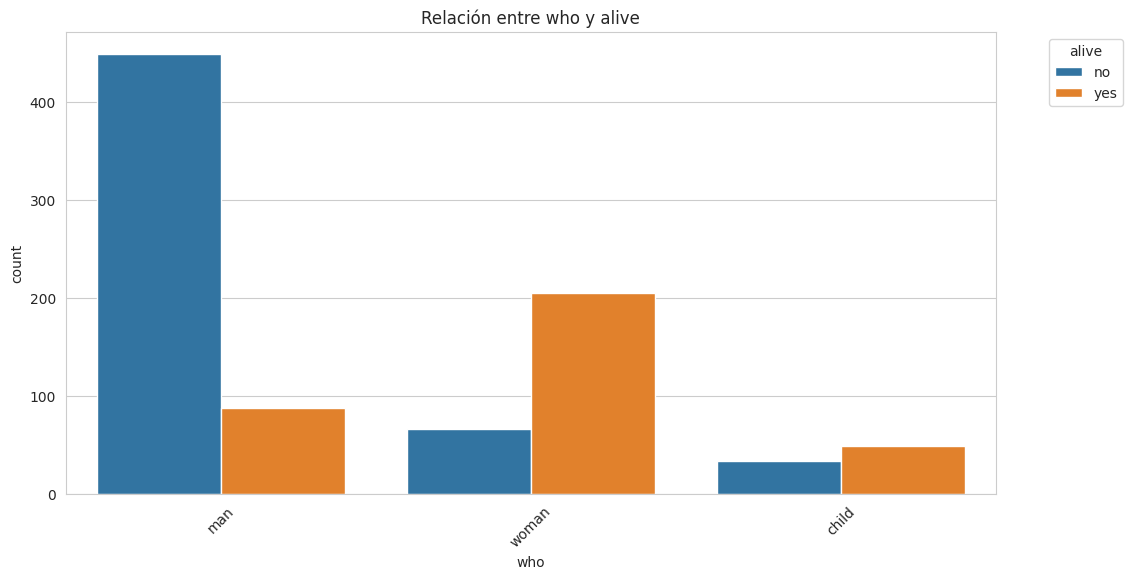


Tabla de contingencia entre who y alive:
alive   no  yes
who            
child   34   49
man    449   88
woman   66  205


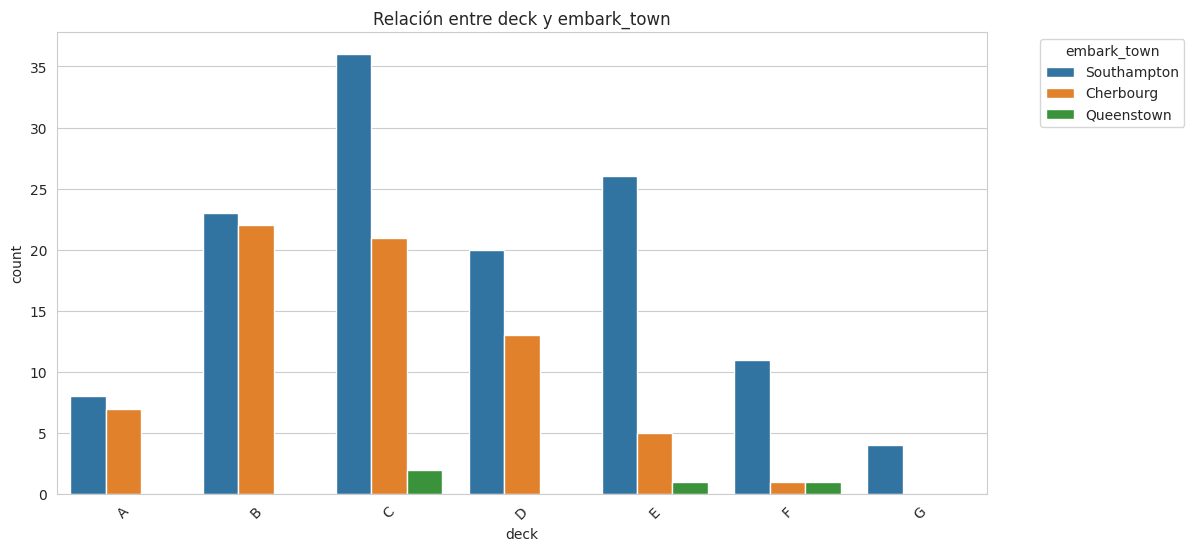


Tabla de contingencia entre deck y embark_town:
embark_town  Cherbourg  Queenstown  Southampton
deck                                           
A                    7           0            8
B                   22           0           23
C                   21           2           36
D                   13           0           20
E                    5           1           26
F                    1           1           11
G                    0           0            4


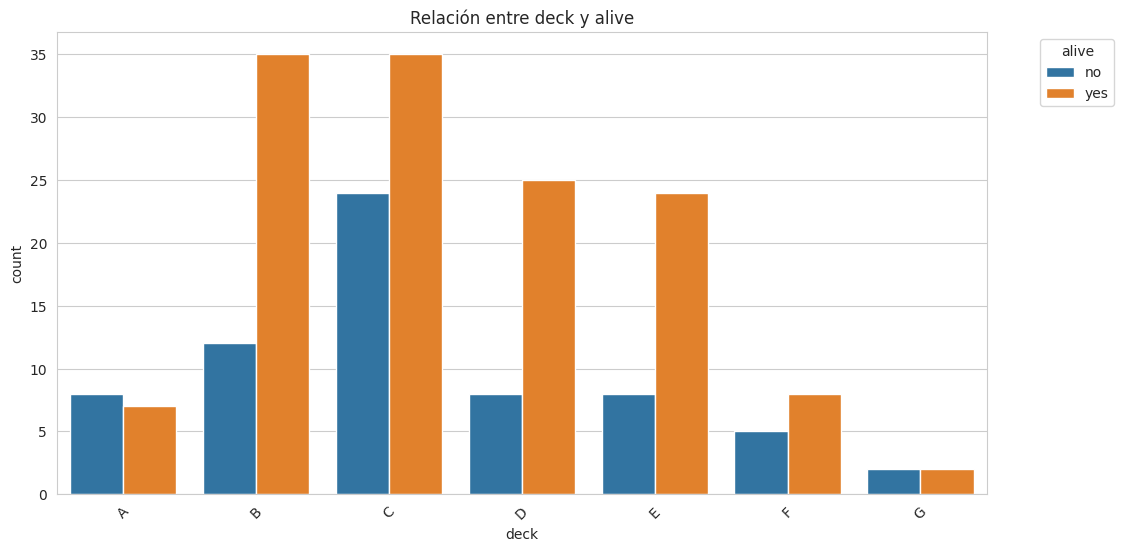


Tabla de contingencia entre deck y alive:
alive  no  yes
deck          
A       8    7
B      12   35
C      24   35
D       8   25
E       8   24
F       5    8
G       2    2


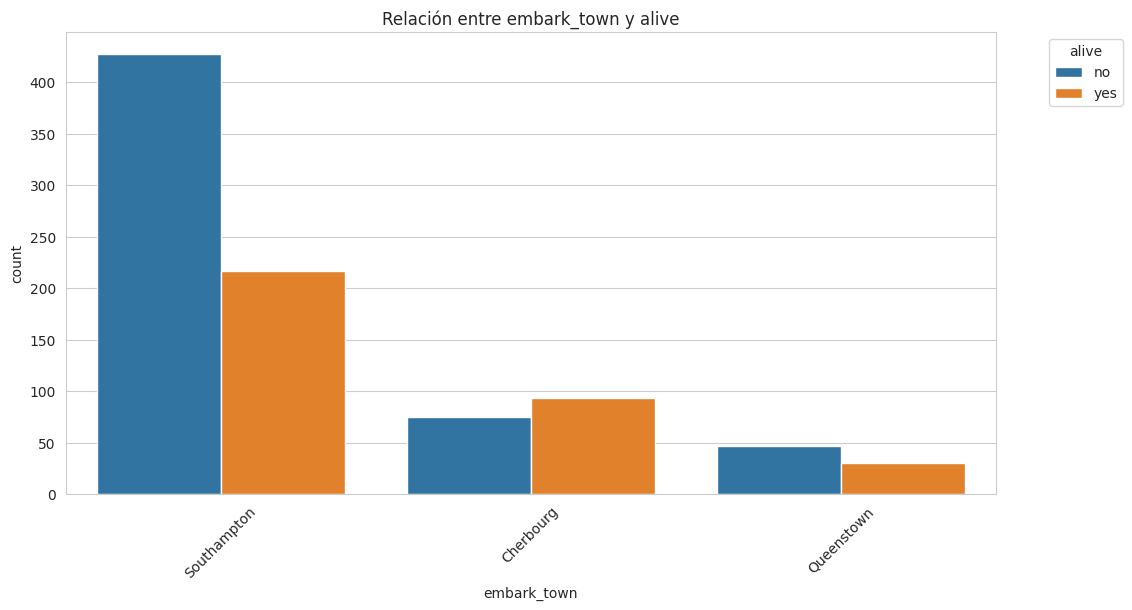


Tabla de contingencia entre embark_town y alive:
alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  217


In [ ]:
# Relación entre variables categóricas
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=cat_cols[i], hue=cat_cols[j])
        plt.title(f'Relación entre {cat_cols[i]} y {cat_cols[j]}')
        plt.xticks(rotation=45)
        plt.legend(title=cat_cols[j], bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

        # Tabla de contingencia
        contingency_table = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        print(f"\nTabla de contingencia entre {cat_cols[i]} y {cat_cols[j]}:")
        print(contingency_table)

# 6. Análisis de Outliers  

Los **outliers** o valores atípicos son observaciones que se desvían significativamente del resto de los datos. Estos pueden deberse a errores en la recopilación de datos, variabilidad natural o la presencia de eventos inusuales. Detectarlos y manejarlos adecuadamente es fundamental para mejorar la calidad del análisis y la precisión de los modelos predictivos.  

### 6.1. Detección de Valores Atípicos  

Antes de decidir cómo tratar los outliers, es importante identificarlos correctamente. Algunas señales de que un valor puede ser atípico incluyen:  

- Valores extremadamente altos o bajos en comparación con la mayoría de los datos.  
- Impacto significativo en medidas estadísticas como la media y la desviación estándar.  
- Datos que no siguen la tendencia general observada en el conjunto de datos.  

### 6.2. Métodos para Identificar Outliers  

Existen varias técnicas estadísticas y visuales para detectar valores atípicos:  

#### **Métodos Estadísticos**  

- **Rango intercuartílico (IQR)**  
  - Se calculan el primer cuartil (Q1) y el tercer cuartil (Q3).  
  - Se define el rango intercuartílico como \(IQR = Q3 - Q1\).  
  - Un dato se considera atípico si está fuera del rango:  
    ![IQR-FORMULE](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*fHsrwBBMwA_Q8tsx)
  - Se puede visualizar con diagramas de caja (*boxplots*).  

- **Z-score (Puntaje Z)**  
  - Se mide la distancia de cada dato con respecto a la media en términos de desviaciones estándar:  
  ![Formel-z-score.png](https://i0.wp.com/cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png?ssl=1&w=1024&resize=1024&ssl=1)
  - Un valor absoluto mayor a 3 se considera generalmente un outlier.  

#### **Métodos Visuales**  

- **Boxplots**: Muestran los valores atípicos como puntos fuera del rango intercuartílico.  
- **Gráficos de dispersión (*scatter plots*)**: Permiten identificar valores que se desvían del patrón general.  
- **Histogramas y KDE plots**: Ayudan a detectar distribuciones asimétricas o valores extremos.  

### 6.3. Estrategias para Manejar Outliers  

Dependiendo del contexto y el impacto de los outliers en el análisis, existen diversas estrategias para tratarlos:  

- **Eliminación de outliers**  
  - Se recomienda solo si hay evidencia clara de que el dato es erróneo o irrelevante.  
  - Puede aplicarse cuando los valores extremos afectan de manera significativa el análisis.  

- **Transformación de datos**  
  - Uso de transformaciones como logaritmo (*log*), raíz cuadrada (*sqrt*) o Box-Cox para reducir la influencia de valores extremos.  

- **Imputación de valores**  
  - Reemplazo de outliers con la media, mediana o valores interpolados.  
  - Uso de modelos predictivos para estimar valores razonables.  

- **Tratamiento en modelos predictivos**  
  - Algunos algoritmos, como los árboles de decisión, son menos sensibles a outliers, mientras que otros, como la regresión lineal, pueden verse afectados significativamente.  

El análisis y tratamiento de outliers es clave para garantizar que los datos sean representativos y evitar distorsiones en las conclusiones.  


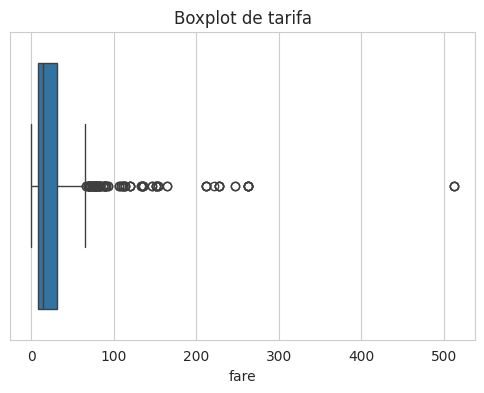

In [ ]:
# Boxplot para identificar outliers
sns.boxplot(x=df["fare"])
plt.title(f'Boxplot de tarifa')
plt.show()

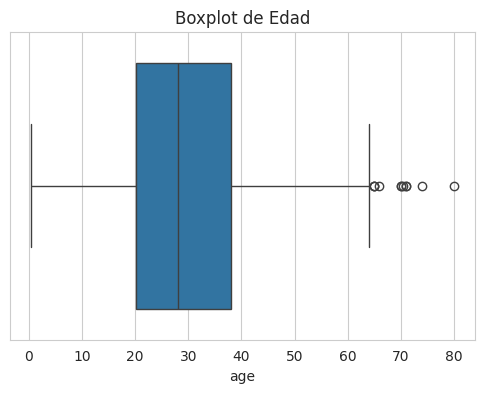

In [ ]:
# Boxplot para identificar outliers
sns.boxplot(x=df["age"])
plt.title(f'Boxplot de Edad')
plt.show()

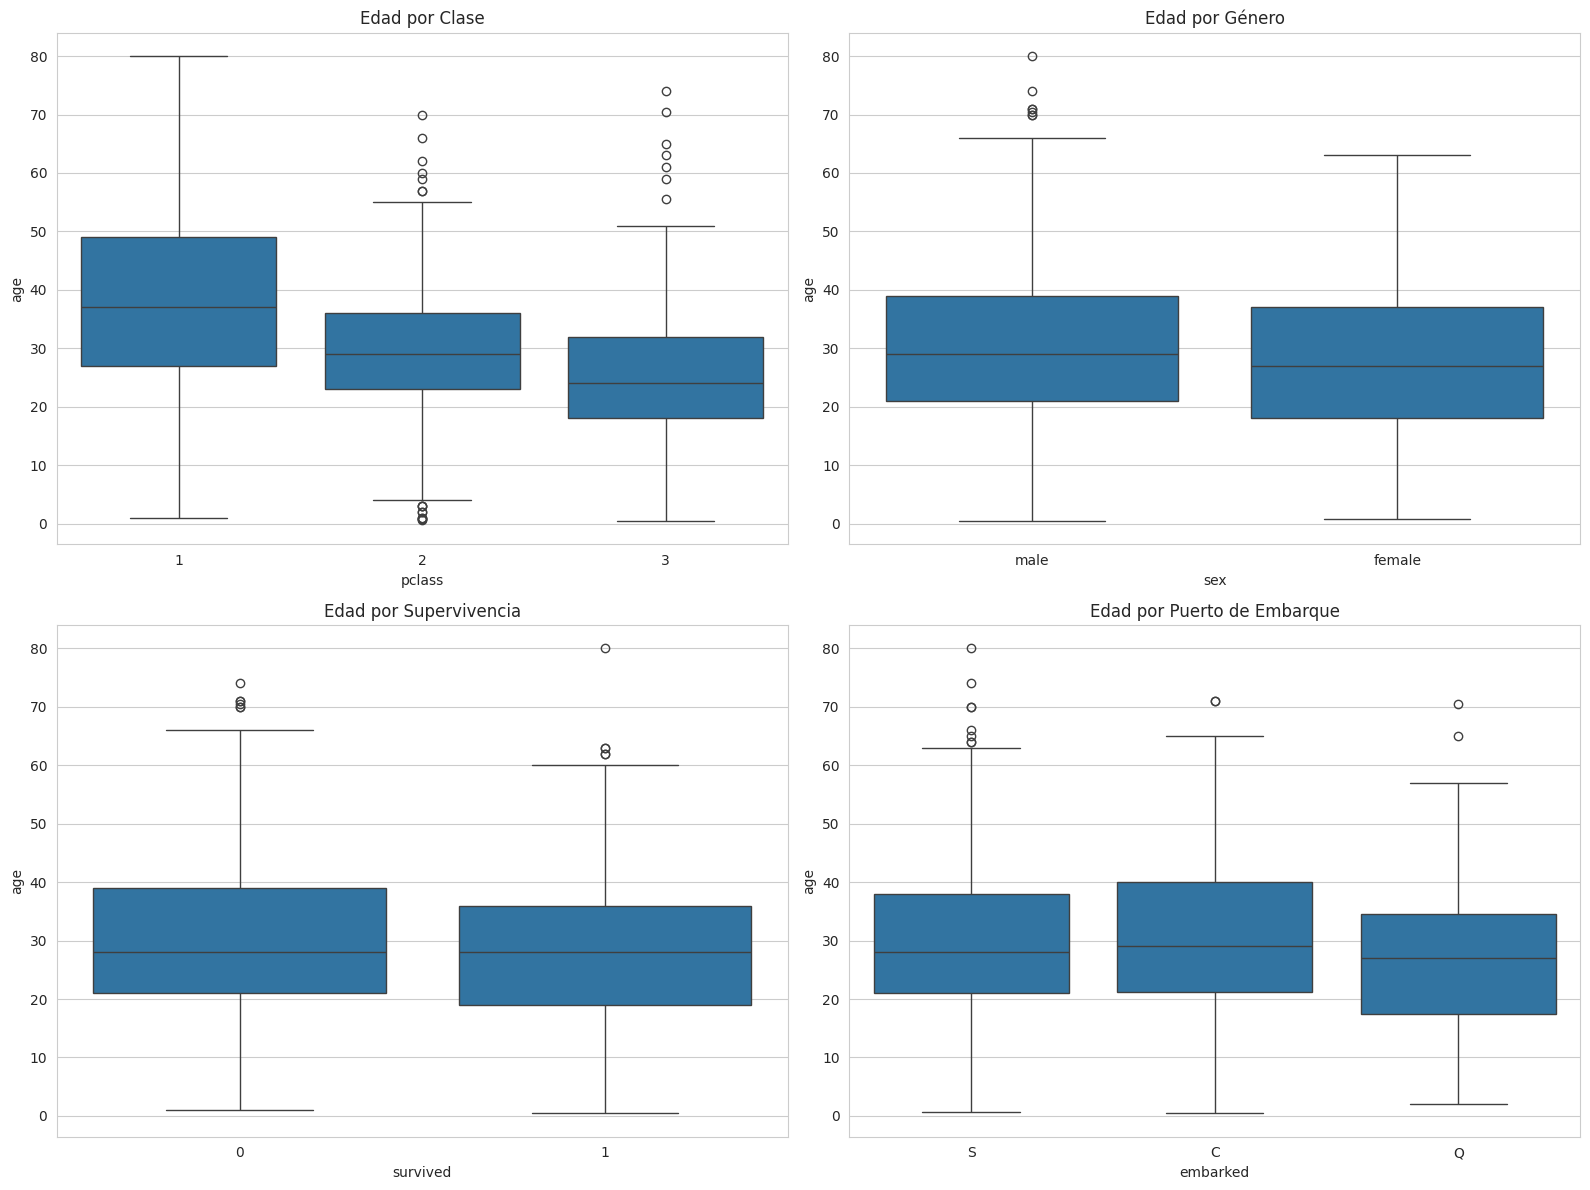

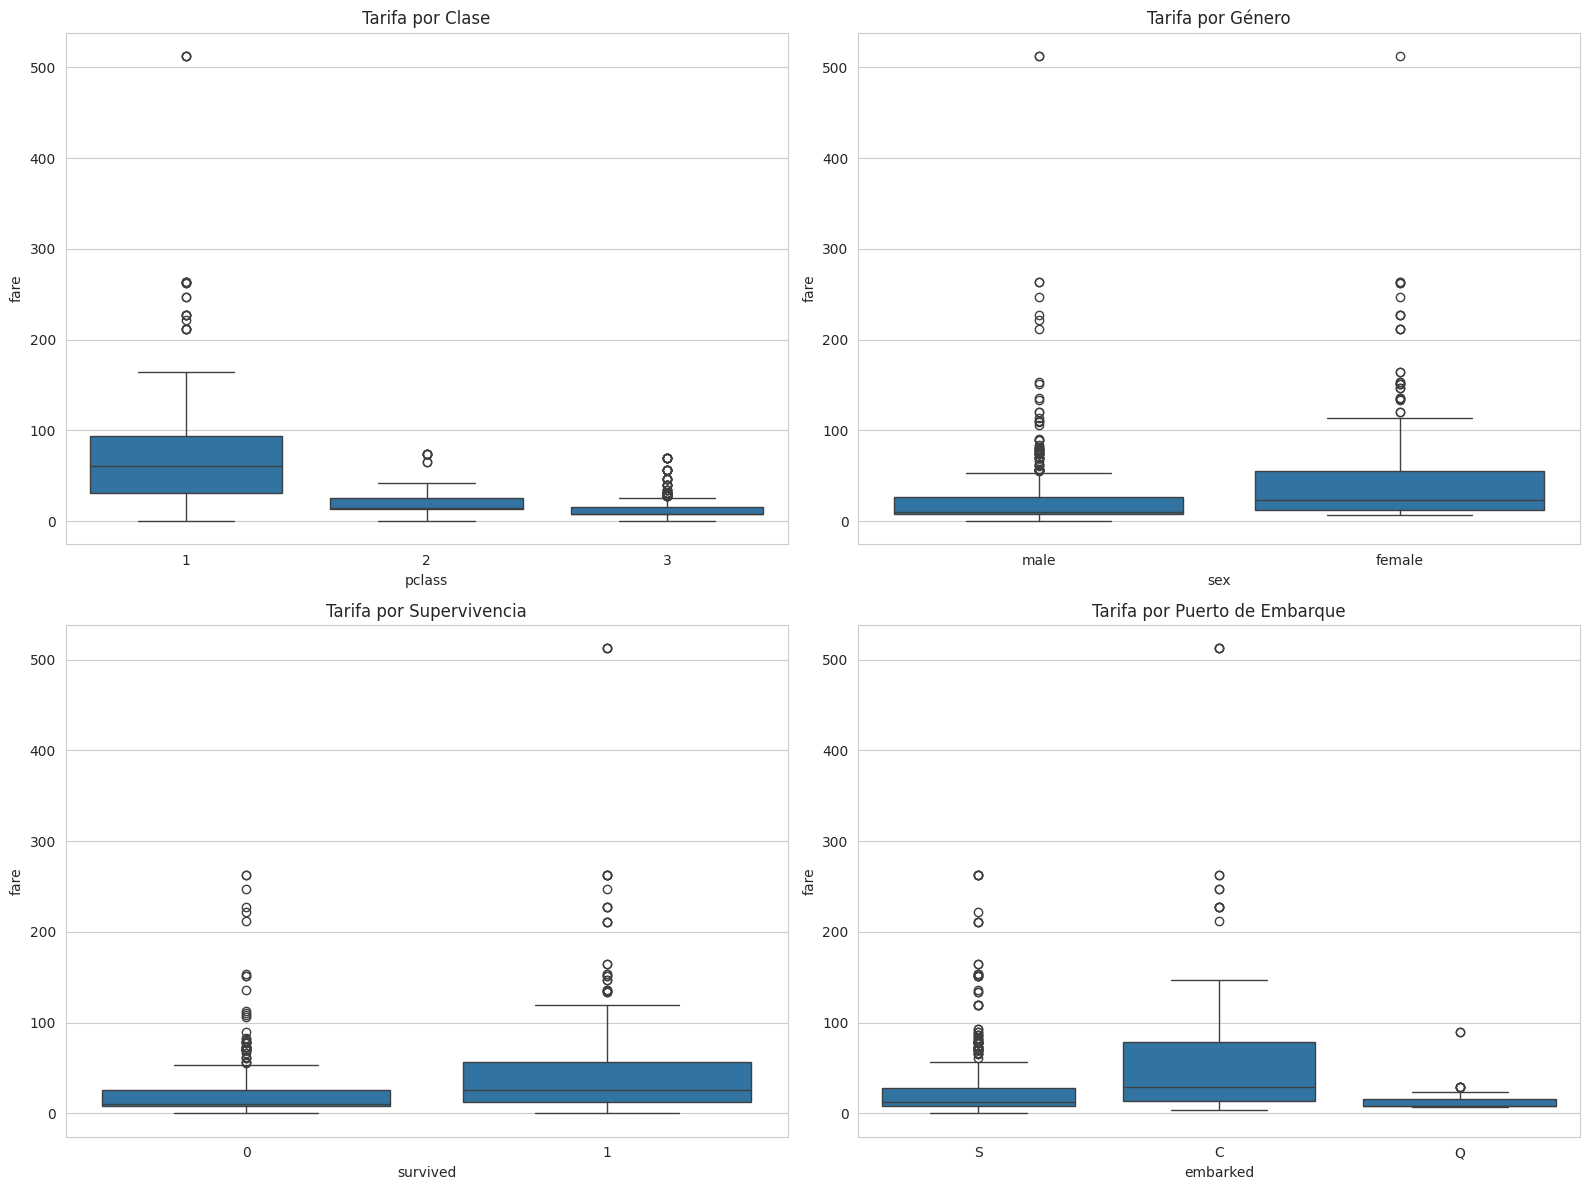

In [ ]:
# Relación con Edad
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) #Creates a 2x2 grid of subplots

sns.boxplot(x='pclass', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Edad por Clase')

sns.boxplot(x='sex', y='age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Edad por Género')

sns.boxplot(x='survived', y='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Edad por Supervivencia')

sns.boxplot(x='embarked', y='age', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Edad por Puerto de Embarque')

plt.tight_layout()
plt.show()

# Relación con Tarifa
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) #Creates a 2x2 grid of subplots

sns.boxplot(x='pclass', y='fare', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tarifa por Clase')

sns.boxplot(x='sex', y='fare', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tarifa por Género')

sns.boxplot(x='survived', y='fare', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tarifa por Supervivencia')

sns.boxplot(x='embarked', y='fare', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tarifa por Puerto de Embarque')

plt.tight_layout()
plt.show()

# 7. Transformación de Variables  

La **transformación de variables** es una etapa fundamental en el procesamiento de datos, ya que permite mejorar la interpretación, el rendimiento de los modelos y la calidad del análisis. Incluye técnicas para escalar datos numéricos, convertir variables categóricas y crear nuevas características que enriquezcan el conjunto de datos.  

### 7.1. Normalización de Datos  

La normalización es clave cuando los datos tienen escalas diferentes o valores extremos que pueden afectar el rendimiento de los modelos. Existen varios métodos:  

- **Min-Max Scaling (Escalado Min-Max)**  
  - Convierte los valores en un rango específico, generalmente entre 0 y 1:  
    ![Escalado-min-max](https://www.oreilly.com/api/v2/epubs/9781788393485/files/assets/545d977f-9de2-4280-b08a-0436149980c5.png)
  - Se implementa con `MinMaxScaler()` en `sklearn.preprocessing`.  
  - Útil para modelos basados en distancias como KNN o SVM.  

- **Estandarización (Z-score Scaling)**  
  - Transforma los datos con media 0 y desviación estándar 1:  
    ![Z-score](https://i0.wp.com/cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png?ssl=1&w=1024&resize=1024&ssl=1)
  - Se implementa con `StandardScaler()` en `sklearn.preprocessing`.  
  - Adecuado para algoritmos como regresión lineal y redes neuronales.  

- **Transformaciones No Lineales**  
  - *Logarítmica*: Reduce el impacto de valores extremos en distribuciones sesgadas.  
  - *Raíz cuadrada y Box-Cox*: Suavizan distribuciones asimétricas.  

### 7.2. Codificación de Variables Categóricas  

Cuando las variables contienen valores de texto o categorías, es necesario convertirlas a una representación numérica para que los modelos puedan procesarlas.  

- **One-Hot Encoding (Codificación One-Hot)**  
  - Crea una columna binaria para cada categoría.  
  - Se usa `pd.get_dummies(df, columns=['columna'])` en Pandas o `OneHotEncoder()` en Scikit-Learn.  
  - Aumenta la dimensionalidad del conjunto de datos.  

- **Label Encoding (Codificación Ordinal)**  
  - Asigna un número entero a cada categoría.  
  - Se usa `LabelEncoder()` en `sklearn.preprocessing`.  
  - Adecuado solo cuando hay un orden natural entre categorías.  

- **Target Encoding (Codificación basada en la variable objetivo)**  
  - Reemplaza cada categoría con la media de la variable objetivo.  
  - Útil en problemas de clasificación, pero puede causar sobreajuste.  

### 7.3. Creación de Nuevas Características  

La ingeniería de características puede mejorar significativamente el desempeño de los modelos. Algunas estrategias incluyen:  

- **Combinaciones de variables**  
  - Crear nuevas variables a partir de la suma, resta, multiplicación o división de otras.  
  - Ejemplo: *Precio por metro cuadrado* = `precio_total / metros_cuadrados`.  

- **Extracción de información temporal**  
  - Extraer *día de la semana*, *mes* o *hora* de una fecha para detectar patrones temporales.  

- **Agrupación de valores**  
  - Convertir variables numéricas en rangos (*binned features*).  
  - Ejemplo: Categorizar edades en *joven*, *adulto* y *mayor*.  

- **Análisis de texto**  
  - Extraer la longitud de textos o la frecuencia de palabras clave.



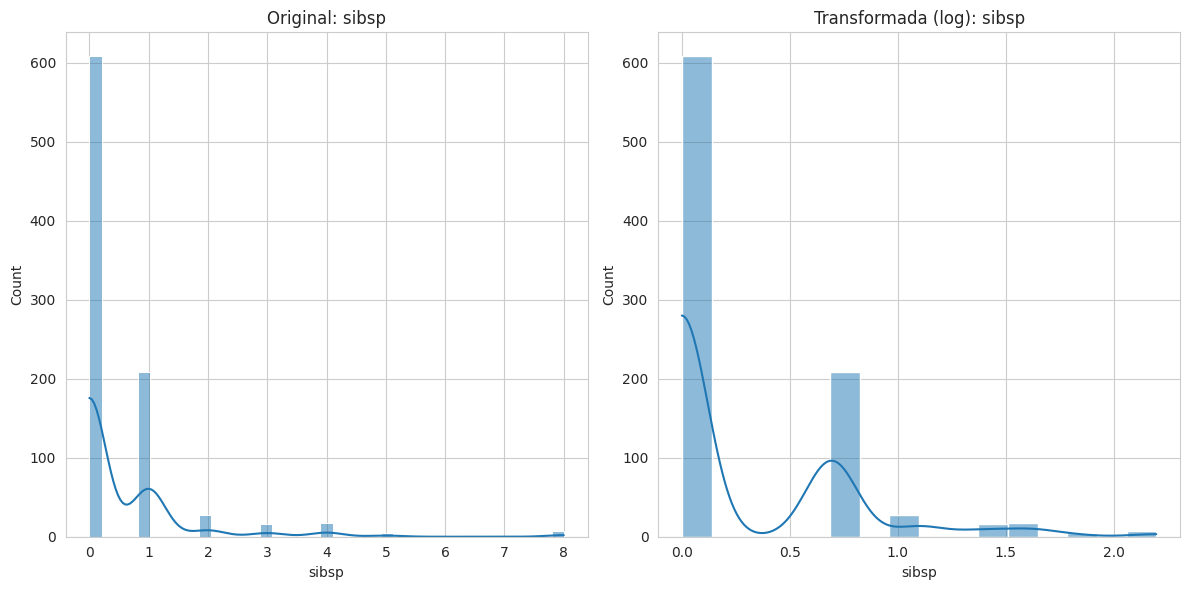

Asimetría original para sibsp: 3.70
Asimetría transformada para sibsp: 1.66


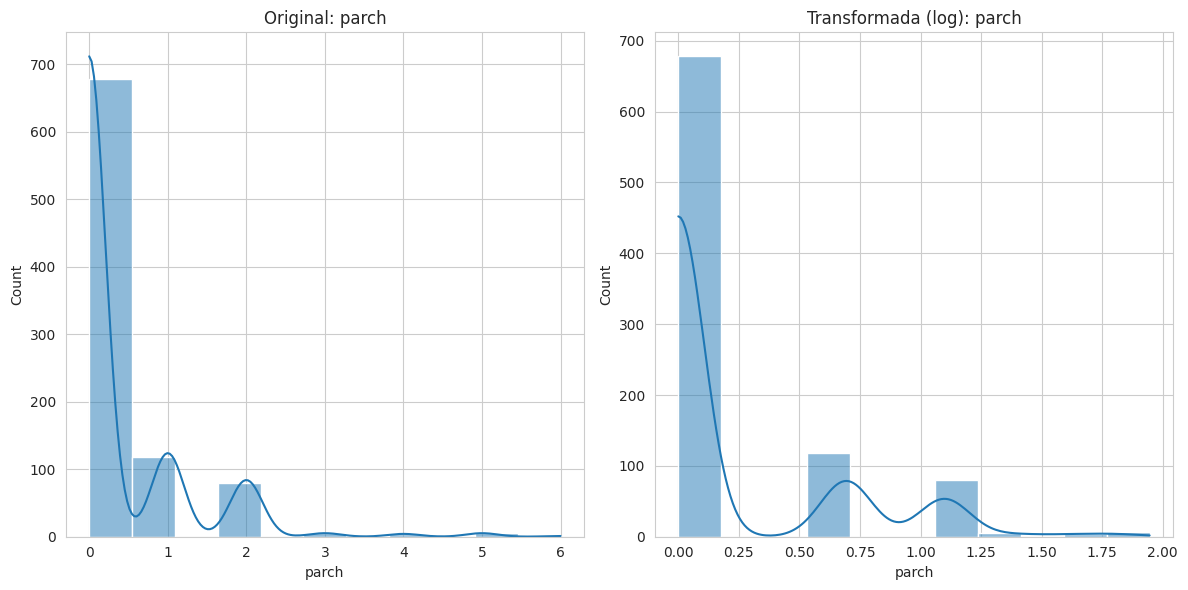

Asimetría original para parch: 2.75
Asimetría transformada para parch: 1.68


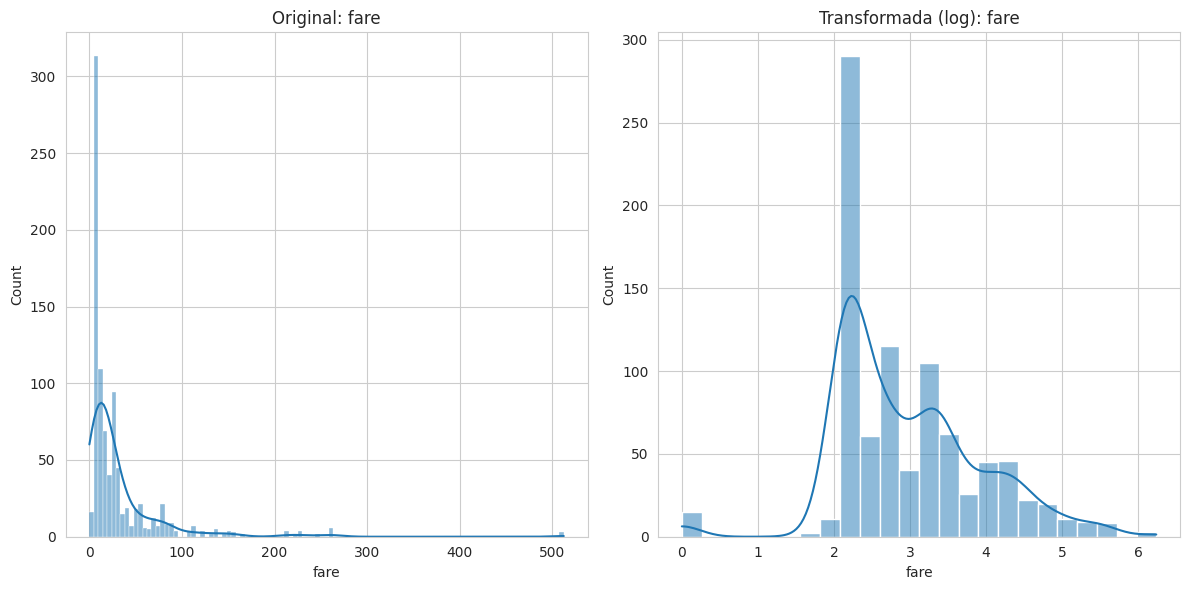

Asimetría original para fare: 4.79
Asimetría transformada para fare: 0.39


In [ ]:
# Transformación de variables numéricas (logarítmica para distribuciones sesgadas)
for col in num_cols:
    if df[col].skew() > 1 or df[col].skew() < -1:
        plt.figure(figsize=(12, 6))

        # Antes de la transformación
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Original: {col}')

        # Después de la transformación logarítmica
        plt.subplot(1, 2, 2)
        transformed = np.log1p(df[col])
        sns.histplot(transformed, kde=True)
        plt.title(f'Transformada (log): {col}')

        plt.tight_layout()
        plt.show()

        print(f"Asimetría original para {col}: {df[col].skew():.2f}")
        print(f"Asimetría transformada para {col}: {transformed.skew():.2f}")



In [ ]:
# Codificación de variables categóricas
for col in cat_cols:
    print(f"\nCodificación para {col}:")
    print(pd.get_dummies(df[col], prefix=col, drop_first=True).head())


Codificación para sex:
   sex_male
0      True
1     False
2     False
3     False
4      True

Codificación para embarked:
   embarked_Q  embarked_S
0       False        True
1       False       False
2       False        True
3       False        True
4       False        True

Codificación para class:
   class_Second  class_Third
0         False         True
1         False        False
2         False         True
3         False        False
4         False         True

Codificación para who:
   who_man  who_woman
0     True      False
1    False       True
2    False       True
3    False       True
4     True      False

Codificación para adult_male:
   adult_male_True
0             True
1            False
2            False
3            False
4             True

Codificación para deck:
   deck_B  deck_C  deck_D  deck_E  deck_F  deck_G
0   False   False   False   False   False   False
1   False    True   False   False   False   False
2   False   False   False   False   False  

# 8. Análisis de Relaciones con la Variable Objetivo  

El análisis de la relación entre las variables predictoras y la **variable objetivo** es una etapa fundamental en cualquier proyecto de modelado. Permite identificar qué características tienen un mayor impacto en la predicción y ayuda a tomar decisiones informadas sobre la selección de variables relevantes.

**Una variable objetivo** (también conocida como variable dependiente, target variable, outcome variable o label) es la variable que *se desea predecir o explicar* en un análisis de datos o en un modelo de machine learning. Es el punto central de cualquier modelo predictivo, ya que es la variable cuyo comportamiento o valor tratamos de entender o pronosticar a partir de otras variables (las variables **predictoras o independientes**).

### 8.1. Importancia de Características  

Para entender qué variables influyen más en la variable objetivo, se pueden aplicar varias técnicas:  

- **Correlación (para variables numéricas)**  
  - Se usa el coeficiente de correlación de Pearson para medir la relación lineal entre una variable y la variable objetivo.  
  - Un valor cercano a **1** o **-1** indica una fuerte relación, mientras que un valor cercano a **0** sugiere una relación débil o nula.  
  - Se calcula con `df.corr()` en Pandas.  

- **Importancia en modelos de Machine Learning**  
  - Árboles de decisión y modelos basados en `RandomForest` permiten calcular la importancia de las características automáticamente.  
  - Se obtiene con `feature_importances_` en `sklearn.ensemble.RandomForestClassifier` o `RandomForestRegressor`.  

- **Información mutua (para variables categóricas y mixtas)**  
  - Se basa en la teoría de la información para medir cuánto conocimiento sobre la variable objetivo proporciona cada variable.  
  - Se implementa con `mutual_info_classif` o `mutual_info_regression` en Scikit-Learn.  

### 8.2. Diferencias entre Grupos en la Variable Objetivo  

Si la variable objetivo es categórica (por ejemplo, en problemas de clasificación), es útil comparar cómo varían las características entre diferentes clases:  

- **Análisis de medias por categoría**  
  - Comparar la media de una variable numérica en función de la clase de la variable objetivo.  
  - Se realiza con `df.groupby('variable_objetivo').mean()`.  

- **Pruebas estadísticas para detectar diferencias significativas**  
  - *Prueba t de Student* (para comparar dos grupos).  
  - *ANOVA* (para comparar más de dos grupos).  
  - *Chi-cuadrado* (para analizar asociaciones entre variables categóricas).  

Si la variable objetivo es numérica (en problemas de regresión), se pueden analizar patrones de variación utilizando:  

- Diagramas de dispersión (*scatter plots*).  
- Diagramas de cajas y bigotes (*box plots*).  
- Regresiones lineales simples.  

### 8.3. Selección Preliminar de Características  

Una vez identificadas las relaciones con la variable objetivo, es posible reducir la dimensionalidad del conjunto de datos eliminando variables irrelevantes o redundantes. Algunas estrategias incluyen:  

- **Eliminar variables con baja correlación con la variable objetivo.**  
- **Descartar variables con alta correlación entre sí (multicolinealidad),** usando el *Variance Inflation Factor (VIF)*.  
- **Utilizar técnicas automáticas de selección de características,** como `SelectKBest` o `Recursive Feature Elimination (RFE)` en Scikit-Learn.  

El análisis de relaciones con la variable objetivo es crucial para construir modelos eficientes, evitando la inclusión de variables que pueden añadir ruido o sobreajustar el modelo.  



In [ ]:
# Suponiendo que 'survived' es nuestra variable objetivo
if 'survived' in df.columns:
    # Relación con variables numéricas
    for num_col in num_cols:
        #plt.figure(figsize=(12, 6))
        #sns.boxplot(data=df, x='survived', y=num_col)
        #plt.title(f'Distribución de {num_col} por survived')
        #plt.show()

        # Prueba ANOVA para comparar medias entre grupos
        groups = df.groupby(cat_col)[num_col].apply(list)
        f_val, p_val = stats.f_oneway(*groups)
        print(f"ANOVA para {num_col} por {cat_col}: F={f_val:.2f}, p={p_val:.4f}")

        # Prueba t para comparar medias
        group1 = df[df['survived'] == 0][num_col]
        group2 = df[df['survived'] == 1][num_col]
        t_val, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        print(f"Prueba t para {num_col}: t={t_val:.2f}, p={p_val:.4f}")

    # Relación con variables categóricas
    for cat_col in cat_cols:
        #plt.figure(figsize=(12, 6))
        #sns.countplot(data=df, x=cat_col, hue='survived')
        #plt.title(f'Distribución de survived por {cat_col}')
        #plt.xticks(rotation=45)
        #plt.legend(title='survived', bbox_to_anchor=(1.05, 1), loc='upper left')
        #plt.show()

        # Tabla de contingencia con porcentajes
        contingency_table = pd.crosstab(df[cat_col], df['survived'], normalize='index') * 100
        print(f"\nPorcentaje de survived por {cat_col}:")
        print(contingency_table)

ANOVA para survived por alone: F=38.35, p=0.0000
Prueba t para survived: t=-inf, p=0.0000
ANOVA para pclass por alone: F=16.55, p=0.0001
Prueba t para pclass: t=10.34, p=0.0000
ANOVA para age por alone: F=nan, p=nan
Prueba t para age: t=nan, p=nan
ANOVA para sibsp por alone: F=461.26, p=0.0000
Prueba t para sibsp: t=1.19, p=0.2327
ANOVA para parch por alone: F=458.69, p=0.0000
Prueba t para parch: t=-2.48, p=0.0134
ANOVA para fare por alone: F=70.93, p=0.0000
Prueba t para fare: t=-6.84, p=0.0000

Porcentaje de survived por sex:
survived          0          1
sex                           
female    25.796178  74.203822
male      81.109185  18.890815

Porcentaje de survived por embarked:
survived          0          1
embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652

Porcentaje de survived por class:
survived          0          1
class                         
First     37.037037  62.962963
Second    52.717391 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# 9. Resumen y Conclusiones  

El análisis exploratorio de datos (EDA) proporciona una comprensión profunda de las características de los datos y sus relaciones. Al final de este proceso, es fundamental sintetizar los hallazgos, identificar problemas y formular recomendaciones para los siguientes pasos en el análisis o en la construcción de modelos.  

## Temas cubiertos  

### 9.1. Hallazgos Principales  

El objetivo del resumen es destacar los hallazgos más importantes y relevantes que surgieron del EDA. Estos hallazgos pueden incluir:  

- **Distribuciones de las variables**: Cómo se distribuyen los datos (normal, sesgada, etc.).  
- **Relaciones entre variables**: Identificación de correlaciones significativas o relaciones entre variables predictoras y la variable objetivo.  
- **Datos atípicos y valores faltantes**: Determinar si existen valores atípicos o si falta información importante en las variables.  
- **Características importantes**: Variables que tienen un impacto significativo en la variable objetivo, basadas en análisis estadísticos o técnicas de machine learning.  

Un buen resumen debe proporcionar una visión clara de las características del conjunto de datos y cómo estas características podrían influir en el modelo.  

### 9.2. Problemas Identificados  

Durante el EDA, es común encontrar problemas que podrían afectar la calidad del análisis o la precisión de los modelos. Algunos de los problemas más comunes incluyen:  

- **Valores faltantes**: Grandes cantidades de datos ausentes en algunas columnas que podrían afectar el rendimiento del modelo.  
- **Outliers**: Valores atípicos que pueden distorsionar las distribuciones y afectar la exactitud de los modelos predictivos.  
- **Multicolinealidad**: Variables altamente correlacionadas entre sí, lo que puede causar problemas en modelos de regresión lineales o algoritmos sensibles a la multicolinealidad.  
- **Distribuciones sesgadas**: Variables que no siguen una distribución normal y que pueden requerir transformaciones para mejorar el análisis.  

Identificar estos problemas es crucial para decidir cómo tratarlos antes de avanzar al modelado.  

### 9.3. Recomendaciones para Pasos Siguientes  

Basado en los hallazgos y problemas identificados, se deben proponer recomendaciones claras para el análisis posterior. Algunas recomendaciones comunes incluyen:  

- **Manejo de valores faltantes**: Imputar valores faltantes o eliminar registros, dependiendo de la cantidad y la importancia de los datos faltantes.  
- **Tratamiento de outliers**: Eliminar, transformar o manejar los outliers, dependiendo de su impacto en el análisis.  
- **Selección de características**: Elegir las características más relevantes basadas en su importancia para la variable objetivo, utilizando técnicas como la selección automática de características o la eliminación manual de aquellas con baja correlación.  
- **Transformaciones de datos**: Normalizar o estandarizar variables cuando sea necesario para mejorar el rendimiento de ciertos modelos.  
- **Pruebas de validación**: Realizar validaciones cruzadas o pruebas adicionales para verificar la calidad del modelo antes de la implementación.  


In [ ]:
# Resumen de hallazgos
print("\n=== RESUMEN DE HALLAZGOS ===")

# 1. Calidad de los datos
print("\n1. CALIDAD DE DATOS:")
print(f"- Porcentaje total de valores faltantes: {df.isnull().sum().sum()/(len(df)*len(df.columns))*100:.2f}%")
print("- Variables con mayor porcentaje de missing values:")
print(missing_percent.sort_values(ascending=False).head())

# 2. Distribuciones
print("\n2. DISTRIBUCIONES:")
print("- Variables con mayor asimetría:")
print(df[num_cols].skew().sort_values(ascending=False).head())

# 3. Outliers
print("\n3. OUTLIERS:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"- {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# 4. Correlaciones
print("\n4. CORRELACIONES:")
print("Correlaciones más fuertes con la variable objetivo:")
if 'diabetes' in df.columns:
    target_corr = df[num_cols].corr()['diabetes'].abs().sort_values(ascending=False)
    print(target_corr.head())

# 5. Recomendaciones
print("\n5. RECOMENDACIONES PARA PASOS SIGUIENTES:")
print("- Considerar imputación para valores faltantes")
print("- Evaluar transformaciones para variables con alta asimetría")
print("- Investigar outliers para determinar si son errores o valores válidos")
print("- Considerar técnicas de balanceo si la variable objetivo está desequilibrada")


=== RESUMEN DE HALLAZGOS ===

1. CALIDAD DE DATOS:
- Porcentaje total de valores faltantes: 6.50%
- Variables con mayor porcentaje de missing values:
deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
dtype: float64

2. DISTRIBUCIONES:
- Variables con mayor asimetría:
fare        4.787317
sibsp       3.695352
parch       2.749117
survived    0.478523
age         0.389108
dtype: float64

3. OUTLIERS:
- survived: 0 outliers (0.00%)
- pclass: 0 outliers (0.00%)
- age: 11 outliers (1.23%)
- sibsp: 46 outliers (5.16%)
- parch: 213 outliers (23.91%)
- fare: 116 outliers (13.02%)

4. CORRELACIONES:
Correlaciones más fuertes con la variable objetivo:

5. RECOMENDACIONES PARA PASOS SIGUIENTES:
- Considerar imputación para valores faltantes
- Evaluar transformaciones para variables con alta asimetría
- Investigar outliers para determinar si son errores o valores válidos
- Considerar técnicas de balanceo si la variable obj